# IOD Capstone Project: Using Machine Learning to Predict Climate Change

Climate change threatens humanity. Temperature changes of just a few degrees can be devastating to entire species, disrupting the balance of ecosystems. Rising seas threaten coastlines. But warming isn’t the only things that occurs. Extreme weather events of all types become more common and severe, such as wildfires, arctic blasts, and hurricanes. Climate change may also be weakening ocean currents,  which could have further chain reactions.

Economic impacts include damage caused by extreme events, which in recent years has caused an exodus of insurers pulling out of disaster-prone areas. Serious impacts to travel may also arise. Heat waves have been linked to higher stress and irritability, and as they occur more frequently, drops in productivity and rises in violent crime may result. Most worryingly, changing weather patterns and ecosystems may threaten food production. Simply put, climate change is both bad for humanity and bad for business.


# Data background and sources

Our dataset contains 36 metrics on climate change, emissions, forest cover and carbon storage, land use, population, and GDP by country. The data have been assembled from multiple sources.

Temperature change, land use, and forest cover data from the IMF (https://climatedata.imf.org/pages/climatechange-data)



Population data from the United Nations
(https://population.un.org/wpp/)



GDP data from the World Bank
(https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)



Emissions data from Our World In Data
(Assembled by owid on GitHub, original sources provided there)
https://github.com/owid/co2-data/blob/master/README.md

### Data cleaning

Data cleaning was done on a separate notebook, also attached. In summary:

For temperature data, countries with more than five null years were removed. Countries with five or fewer nulls had those nulls filled with the median.

For population and land use data, nulls were filled by ffill and bfill.

Some metrics from the original datasets were dropped for being potentially superfluous or redundant.

Some statistics were rendered in raw land area, which isn't fair as countries are differently sized. When possible, these were recalculated as a percentage of total land.

Extensive reshaping was required to make the data fit together.

After dealing with nulls, ensuring country names were standardized, removing years in which some countries had no data, and calculating a handful of new columns manually, we ended up with 34 metrics on 136 countries over a span of 28 years (1992 to 2019). We will directly load the final dataset here.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [4]:
climate = pd.read_csv("/Users/matthewcavanaugh/Desktop/Data analysis work/Data projects/Using machine learning to predict climate change/Finished files/climate population and gdp data.csv")
climate

,Country,Year,Adjusted GDP in USD,GDP per capita,GDP per capita (% of 1992),Population,Population density (sq km),Sex ratio (males per 100 females),Population growth rate,Life expectancy at birth,...,CO2 from land use change per capita,CO2 emissions from oil per capita,Greenhouse gases per capita,Energy use per capita,Share of global CO2 emissions,CO2 emissions,CO2 emissions per capita,CO2 emissions per capita (yearly change),Temperature deviation from 1951-80 norms (°C),Warming trend since 1992 (°C)
0,Algeria,1992,244668703125,9188.204,100.000,26628568.0,11180.0,106.253,2.521,67.725,...,0.503,1.077,6.204,11971.857,0.355,79.883,3.000,-0.032,-0.312,-0.312
1,Algeria,1993,234160281250,8584.517,93.430,27277048.0,11453.0,106.286,2.294,67.797,...,0.365,1.026,6.271,10893.888,0.360,81.944,3.004,0.004,0.552,0.120
2,Algeria,1994,235861046875,8457.657,92.049,27887279.0,11709.0,106.323,2.133,67.284,...,0.262,1.092,6.277,10807.210,0.385,88.608,3.177,0.173,0.732,0.324
3,Algeria,1995,247243218750,8684.284,94.516,28470191.0,11954.0,106.376,2.005,67.691,...,0.399,0.951,6.764,10996.017,0.411,96.777,3.399,0.222,0.595,0.392
4,Algeria,1996,260883562500,8985.746,97.797,29033044.0,12190.0,106.459,1.911,68.219,...,0.281,0.944,6.777,10692.724,0.412,100.039,3.446,0.047,0.846,0.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,Zimbabwe,2015,39798644531,2763.984,49.166,14399013.0,37221.0,89.738,1.347,58.989,...,0.869,0.261,2.599,3860.920,0.034,12.017,0.835,-0.006,0.970,0.257
3804,Zimbabwe,2016,40963191406,2805.642,49.907,14600294.0,37741.0,89.848,1.429,59.760,...,0.823,0.233,2.381,3227.680,0.030,10.581,0.725,-0.110,1.270,0.298
3805,Zimbabwe,2017,44316742187,2991.851,53.220,14812482.0,38290.0,89.968,1.457,60.263,...,0.762,0.227,2.388,3068.011,0.027,9.827,0.663,-0.062,0.088,0.290
3806,Zimbabwe,2018,43420898437,2888.093,51.374,15034452.0,38864.0,90.093,1.518,60.906,...,0.685,0.277,2.376,3441.986,0.031,11.205,0.745,0.082,0.453,0.296


In [5]:
climate.columns

Index(['Country', 'Year', 'Adjusted GDP in USD', 'GDP per capita',
       'GDP per capita (% of 1992)', 'Population',
       'Population density (sq km)', 'Sex ratio (males per 100 females)',
       'Population growth rate', 'Life expectancy at birth',
       'Infant mortality rate (per 1000 births)',
       'Percent of births by women 15 to 19', 'Fertility rate', 'Median age',
       'Net Migration Rate (per 1,000 population)',
       'Climate altering land cover (% of 2015)',
       'Artificial surfaces (% of total land area)',
       'Inland water bodies (% of total land area)',
       'Permanent snow and glaciers (% of total land area)',
       'Barren land (% of total land area)', 'Land area (1000 HA)',
       'Carbon stocks in forests (million tonnes)',
       'Carbon stocks in forests (% of 1992)', 'Forest area (1000 HA)',
       'Forest area (% of 1992)', 'Share of forest area',
       'CO2 from land use change per capita',
       'CO2 emissions from oil per capita', 'Greenhous

In [6]:
climate.isnull().sum()

Country                                               0
Year                                                  0
Adjusted GDP in USD                                   0
GDP per capita                                        0
GDP per capita (% of 1992)                            0
Population                                            0
Population density (sq km)                            0
Sex ratio (males per 100 females)                     0
Population growth rate                                0
Life expectancy at birth                              0
Infant mortality rate (per 1000 births)               0
Percent of births by women 15 to 19                   0
Fertility rate                                        0
Median age                                            0
Net Migration Rate (per 1,000 population)             0
Climate altering land cover (% of 2015)               0
Artificial surfaces (% of total land area)            0
Inland water bodies (% of total land area)      

# Our target

Our target variable will be "Warming trend since 1992 (°C)" in the year 2019. This is a new column which I calculated manually using an expanding mean of "Temperature deviation from 1951-80 norms (°C)". Every year's warming trend is the average of yearly temperature variations up to and including that year, starting from 1992. For instance, 2002's warming trend is the average of all temperature variations from 1992 to 2002. This metric attempts to capture a long-term trend in temperature changes and flatten outliers. It takes into account all preceding years but gives higher weight to the 10 most recent years.

We are using this metric as it would be unfair and misleading to simply predict the temperature in a given year, as a country may have had unusually cold temperatures that year despite a warming trend overall. When making future predictions, this will show us how much warmer a future year is expected to be *on average* compared to the baseline.

# Our goal
We will train three models on data from 1992-2010 and attempt to predict the 2019 warming trend. The reason we're skipping some years is because this effectively gives us a training size of 67%, and we want to see how the model can handle a time gap.

Once we determine which model performed the best, we will make future predictions for the year 2050.

# Correlation matrix, quick visualizations and stats

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Correlation matrix

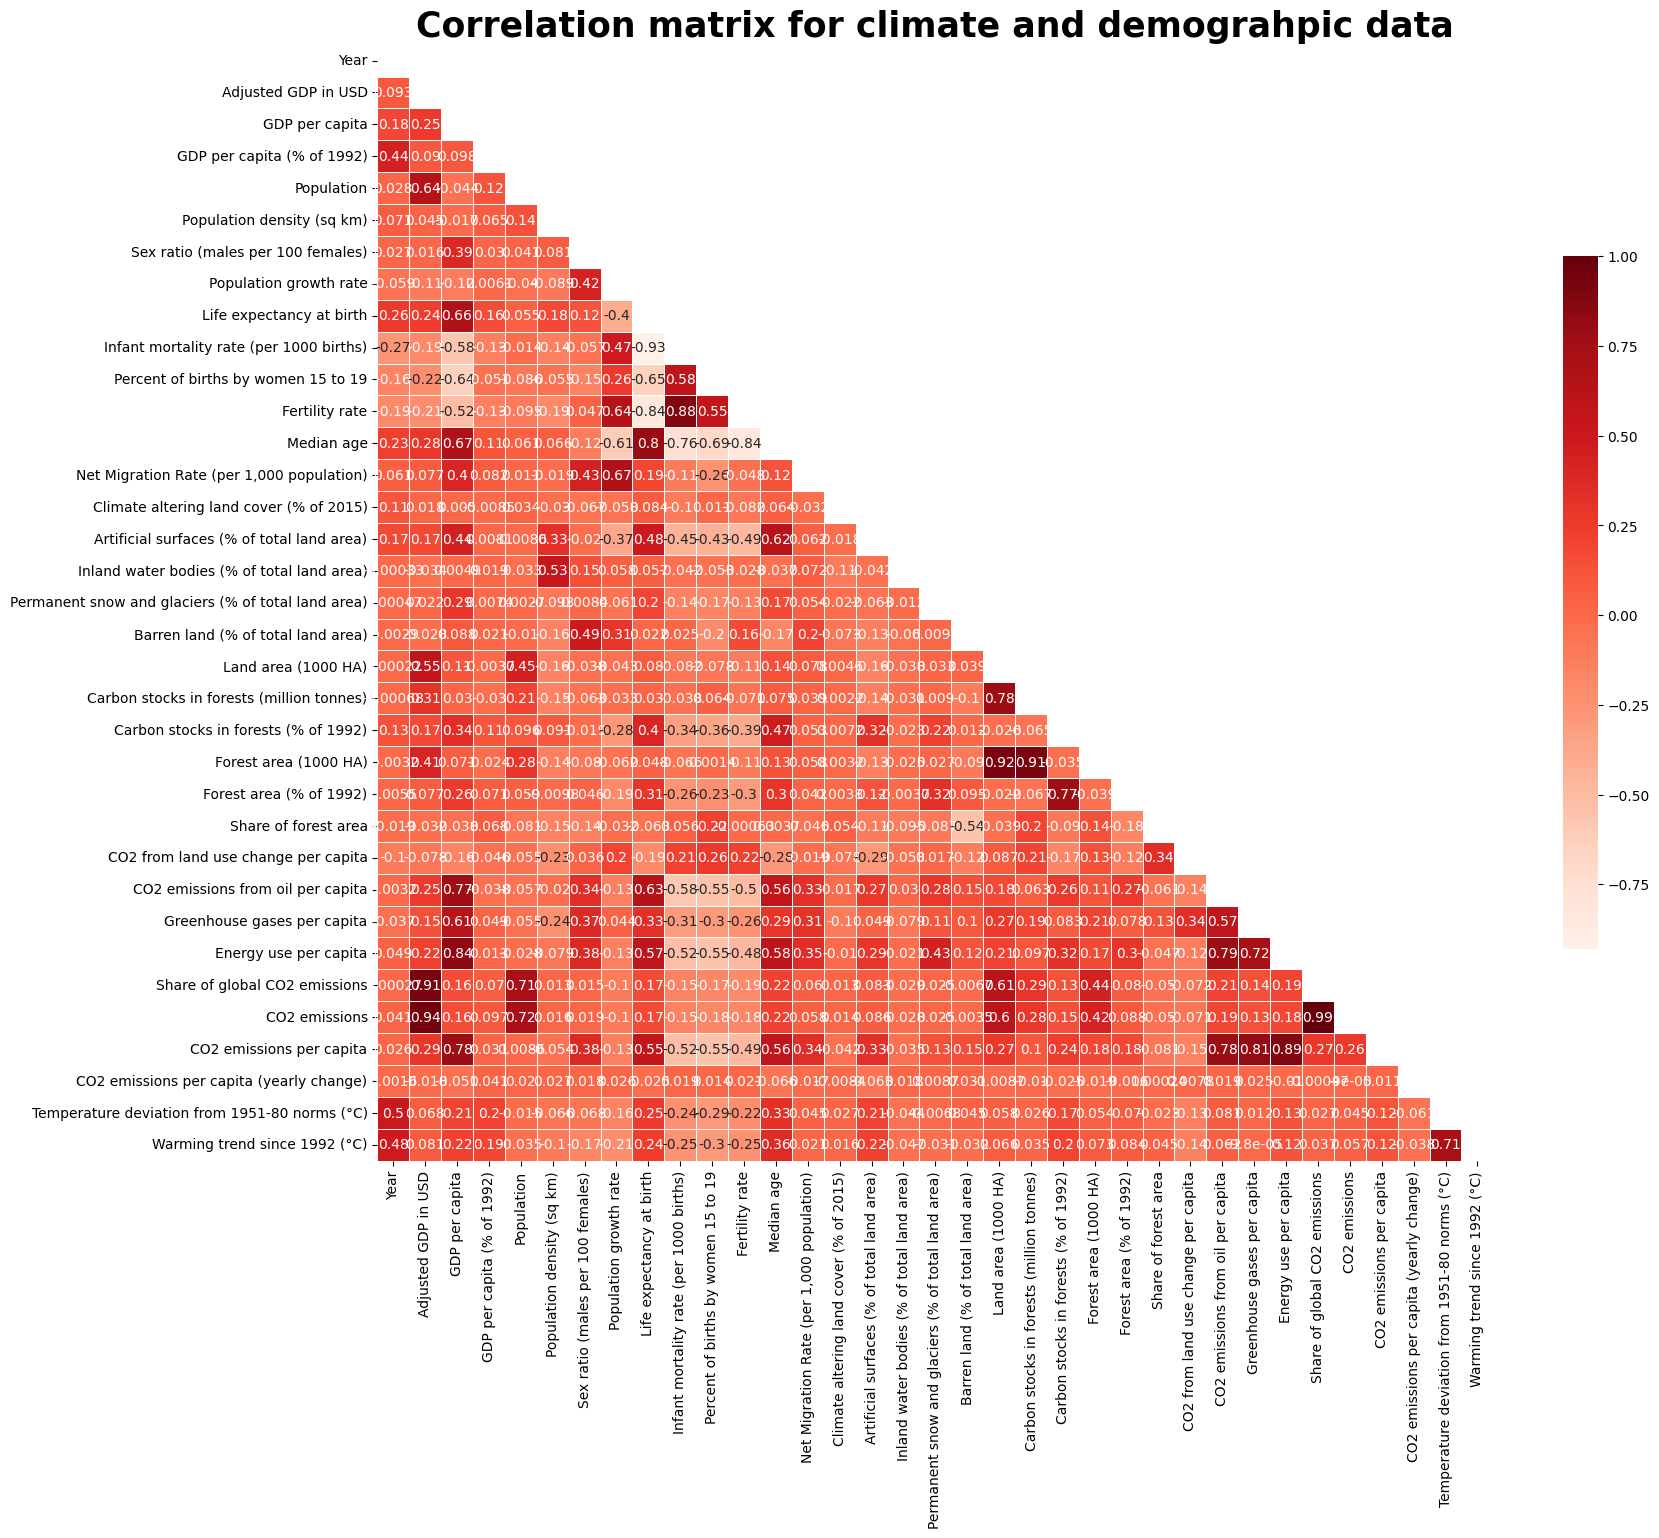

In [8]:
#sns.set(style="whitegrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(climate.corr(numeric_only = True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(climate.corr(numeric_only = True), mask=mask, cmap='Reds', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation matrix for climate and demograhpic data", fontsize=25, fontweight='bold')
#plt.savefig("Correlation matrix for climate data.png")
plt.show()

Let's rank the columns by correlation to a warming trend, to see if there are any identifiable patterns.

In [9]:
# Drop non-numeric columns
corr_to_warming = climate.select_dtypes(include=['number'])


# Compute correlation with target column
correlation_series = corr_to_warming.corr()['Warming trend since 1992 (°C)'].dropna()


# Get columns sorted by absolute correlation value in descending order
sorted_columns = correlation_series.abs().sort_values(ascending=False).index.to_numpy()

print(sorted_columns)

['Warming trend since 1992 (°C)'
 'Temperature deviation from 1951-80 norms (°C)' 'Year' 'Median age'
 'Percent of births by women 15 to 19'
 'Infant mortality rate (per 1000 births)' 'Fertility rate'
 'Life expectancy at birth' 'Artificial surfaces (% of total land area)'
 'GDP per capita' 'Population growth rate'
 'Carbon stocks in forests (% of 1992)' 'GDP per capita (% of 1992)'
 'Sex ratio (males per 100 females)' 'CO2 from land use change per capita'
 'Energy use per capita' 'CO2 emissions per capita'
 'Population density (sq km)' 'Forest area (% of 1992)'
 'Adjusted GDP in USD' 'Forest area (1000 HA)' 'Land area (1000 HA)'
 'CO2 emissions from oil per capita' 'CO2 emissions'
 'Inland water bodies (% of total land area)' 'Share of forest area'
 'CO2 emissions per capita (yearly change)'
 'Share of global CO2 emissions' 'Population'
 'Carbon stocks in forests (million tonnes)'
 'Barren land (% of total land area)'
 'Permanent snow and glaciers (% of total land area)'
 'Net Migrati

"Climate altering land cover" is one of the *least* correlated columns to an upwards temperature trend. That's not quite what I would have expected. However, "artificial surfaces" is moderately correlated, so it's possible the former column is accounting for things like forest planting which may mitigate warming. CO2 emissions in general are also less of a factor than I would have anticipated; within that category, land use change is the strongest predictor, which makes sense as artifical surfaces are also a relatively higher factor

It's also notable that among the most correlated factors to a warming trend are higher teen pregnancy rates, higher infant mortality, and higher population growth rates. The countries that experience these factors tend to also be unstable and underdeveloped, and thus may have less capacity to fight climate change.

Let's plot yearly temperature deviations and long-term trends on line charts, separately and together. Can we see a clear trend?

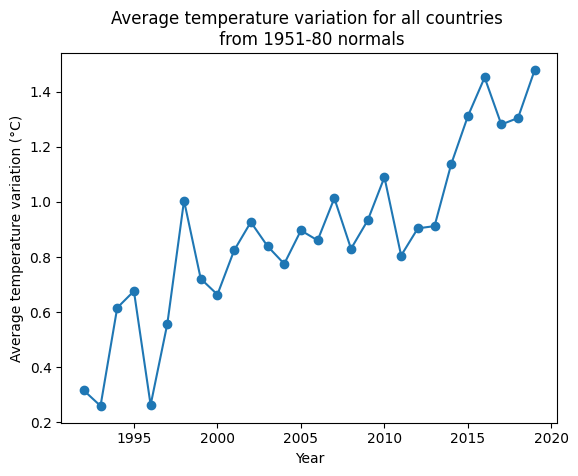

In [10]:
# Calculate the mean of temperature deviations across all countries by year
avgtempbyyear = climate.groupby('Year')['Temperature deviation from 1951-80 norms (°C)'].mean().reset_index()

# Plot the average temperature deviation per year
plt.plot(avgtempbyyear['Year'], avgtempbyyear['Temperature deviation from 1951-80 norms (°C)'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average temperature variation (°C)')
plt.title('Average temperature variation for all countries \n from 1951-80 normals')
#plt.savefig('Average temp variation by year.png')
plt.show()

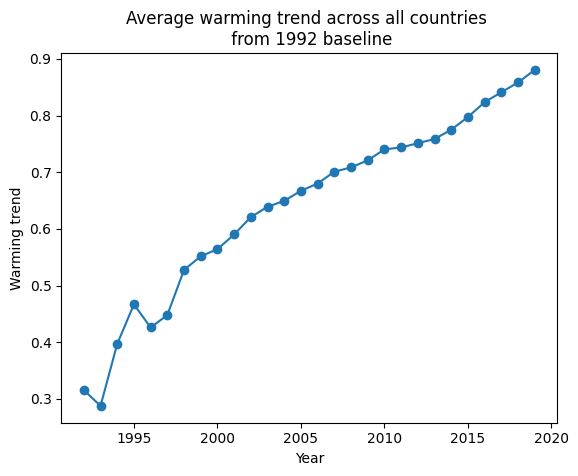

In [11]:
# Take the mean of warming trends across all countries by year
avgtrendbyyear = climate.groupby('Year')['Warming trend since 1992 (°C)'].mean().reset_index()

# Plot the average warming trend by year
plt.plot(avgtrendbyyear['Year'], avgtrendbyyear['Warming trend since 1992 (°C)'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Warming trend')
plt.title('Average warming trend across all countries \n from 1992 baseline')
#plt.savefig('Average temp variation by year rolling.png')
plt.show()

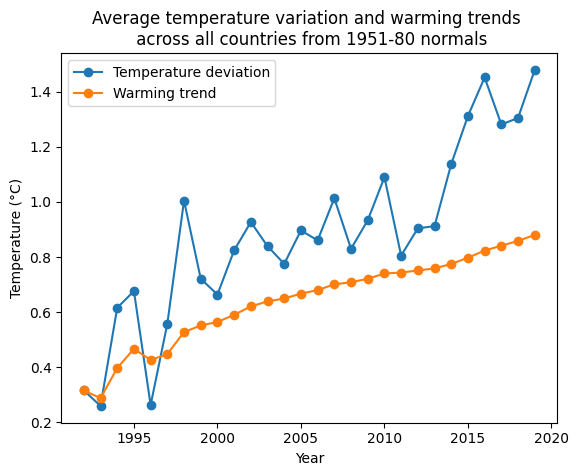

In [12]:
# Plot the average temperature change per year
plt.plot(avgtempbyyear['Year'], avgtempbyyear['Temperature deviation from 1951-80 norms (°C)'], marker='o', label='Temperature deviation')

# Plot the rolling average temperature change per year
plt.plot(avgtrendbyyear['Year'], avgtrendbyyear['Warming trend since 1992 (°C)'], marker='o', label='Warming trend')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average temperature variation and warming trends \n across all countries from 1951-80 normals')

# Add legend to differentiate the lines
plt.legend()

# Save and display the plot
#plt.savefig('Average and rolling average warming trend by year.png')
plt.show()

This isn't a "scientific" measure of average warming across the world, considering that countries are differently sized, some countries are not present, and the dataset does not include oceans, which cool more slowly than land. But as a whole, this graph shows how the warming trend is supposed to respond to temperature deviations over time.

Though not every year has been warmer than the last, the long-term trend is clear. You can see the blue line pull the orange line up, with a noticeable acceleration in the second half of the 2010s. What this means is that as more consecutive years are increasingly hotter than the historical average, the long-term trend accelerates towards increased warming.

Which individual countries had the highest warming trend?

In [13]:
year2019 = climate[climate['Year'] == 2019]
year2019.set_index('Country', inplace=True)
year2019

,Year,Adjusted GDP in USD,GDP per capita,GDP per capita (% of 1992),Population,Population density (sq km),Sex ratio (males per 100 females),Population growth rate,Life expectancy at birth,Infant mortality rate (per 1000 births),...,CO2 from land use change per capita,CO2 emissions from oil per capita,Greenhouse gases per capita,Energy use per capita,Share of global CO2 emissions,CO2 emissions,CO2 emissions per capita,CO2 emissions per capita (yearly change),Temperature deviation from 1951-80 norms (°C),Warming trend since 1992 (°C)
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,2019,507487562500,11721.743,127.574,43294546.0,18178.0,104.453,1.806,75.682,19.590,...,0.058,1.377,6.478,16259.053,0.485,179.907,4.155,0.092,1.115,1.178
Angola,2019,227855718750,7037.877,224.278,32375632.0,25969.0,97.764,3.366,63.051,55.343,...,1.733,0.441,5.772,3667.424,0.059,22.047,0.681,-0.064,1.752,0.760
Argentina,2019,977420562500,21733.272,258.637,44973465.0,16109.0,98.420,0.635,76.847,10.049,...,3.552,1.664,9.716,20725.168,0.481,178.508,3.969,-0.075,0.760,0.465
Armenia,2019,43582574218,15007.918,420.820,2903972.0,102023.0,85.808,-0.240,75.193,10.529,...,0.066,0.360,3.189,16179.096,0.017,6.284,2.164,0.163,1.859,1.010
Australia,2019,1364677750000,53553.077,178.039,25482714.0,3317.0,98.513,1.359,83.241,3.236,...,1.486,5.626,24.622,66247.297,1.121,415.770,16.316,-0.228,1.422,0.757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,2019,20595844000000,60972.320,153.660,337790067.0,36927.0,101.134,0.801,78.916,5.535,...,0.172,6.990,18.403,79500.234,14.182,5262.145,15.578,-0.472,1.034,0.847
Uruguay,2019,71122789062,20935.672,184.333,3397206.0,19615.0,94.155,0.029,77.503,6.668,...,0.588,1.753,12.001,19985.010,0.017,6.409,1.887,-0.048,0.766,0.582
Vietnam,2019,724123375000,7451.839,492.350,97173776.0,310054.0,95.874,0.919,74.211,15.761,...,1.064,0.729,5.598,12556.660,0.914,339.147,3.490,0.837,1.811,0.683


In [14]:
print("Top 15 countries that warmed the most on average \n in 2019 compared to historic norms:")
for country, underestimation in year2019['Warming trend since 1992 (°C)'].nlargest(15).items():
    fahrenheit = (underestimation * 9/5)  # Only apply conversion to the warming trend
    print(f"{country}: {round(underestimation, 3)}°C / {round(fahrenheit, 3)}°F")

Top 15 countries that warmed the most on average 
 in 2019 compared to historic norms:
Estonia: 1.445°C / 2.601°F
Austria: 1.408°C / 2.534°F
Latvia: 1.408°C / 2.534°F
Russia: 1.4°C / 2.52°F
Slovenia: 1.398°C / 2.516°F
Mongolia: 1.396°C / 2.513°F
Finland: 1.385°C / 2.493°F
Lithuania: 1.364°C / 2.455°F
Mauritania: 1.346°C / 2.423°F
Switzerland: 1.339°C / 2.41°F
Czechia: 1.334°C / 2.401°F
Germany: 1.309°C / 2.356°F
Sweden: 1.295°C / 2.331°F
Cabo Verde: 1.262°C / 2.272°F
Tunisia: 1.254°C / 2.257°F


In [15]:
print("Top 15 countries that warmed the least on average \n in 2019 compared to historic norms:")
for country, underestimation in year2019['Warming trend since 1992 (°C)'].nsmallest(15).items():
    fahrenheit = (underestimation * 9/5)  # Only apply conversion to the warming trend
    print(f"{country}: {round(underestimation, 3)}°C / {round(fahrenheit, 3)}°F")

Top 15 countries that warmed the least on average 
 in 2019 compared to historic norms:
Zimbabwe: 0.318°C / 0.572°F
Chile: 0.381°C / 0.686°F
Botswana: 0.405°C / 0.729°F
New Zealand: 0.425°C / 0.765°F
Bangladesh: 0.433°C / 0.779°F
Argentina: 0.465°C / 0.837°F
Comoros: 0.466°C / 0.839°F
Nepal: 0.466°C / 0.839°F
India: 0.552°C / 0.994°F
Paraguay: 0.572°C / 1.03°F
Uruguay: 0.582°C / 1.048°F
Pakistan: 0.589°C / 1.06°F
Maldives: 0.605°C / 1.089°F
Indonesia: 0.612°C / 1.102°F
Fiji: 0.613°C / 1.103°F


# Model 1: Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV

In [17]:
# Select relevant columns
target = 'Warming trend since 1992 (°C)'
features = [col for col in climate.columns if col not in ['Country', 'Year', target]]

In [18]:
# Split data into train (1992-2010) and test (2019)
train_data_linreg = climate[(climate['Year'] >= 1992) & (climate['Year'] <= 2010)]
test_data_linreg = climate[climate['Year'] == 2019]

In [19]:
# Prepare X (features) and y (target)
X_train_linreg, y_train_linreg = train_data_linreg[features], train_data_linreg[target]
X_test_linreg, y_test_linreg = test_data_linreg[features], test_data_linreg[target]

In [20]:
# Train the model
linreg = LinearRegression()
linreg.fit(X_train_linreg, y_train_linreg)

LinearRegression()

In [21]:
import joblib

In [22]:
joblib.dump(linreg, 'linreg.joblib')

['linreg.joblib']

In [23]:
joblib.load('linreg.joblib', mmap_mode=None)

LinearRegression()

In [24]:
# Predict for 2019
y_pred_linreg = linreg.predict(X_test_linreg)

In [25]:
mean_absolute_error(y_test_linreg, y_pred_linreg)

0.18205372806396225

In [26]:
mean_squared_error(y_test_linreg, y_pred_linreg)

0.05063863400219383

In [27]:
median_absolute_error(y_test_linreg, y_pred_linreg)

0.15346162589781548

In [28]:
np.sqrt(mean_squared_error(y_test_linreg, y_pred_linreg))

0.2250302957430262

### Linear regression: Underestimations, overestimations, and accuracy

In [29]:
linreg_results = test_data_linreg[["Country"]].copy()  # Start with country names
linreg_results["Predicted warming trend"] = y_pred_linreg.round(3)  # Add predicted values
linreg_results["Actual warming trend"] = y_test_linreg.values.round(3)  # Add actual values
linreg_results["Prediction error"] = linreg_results["Predicted warming trend"] - linreg_results["Actual warming trend"]
linreg_results["Absolute prediction error"] = linreg_results["Prediction error"].abs()
linreg_results.set_index('Country', inplace=True)
linreg_results

,Predicted warming trend,Actual warming trend,Prediction error,Absolute prediction error
Country,,,,
Algeria,0.721,1.178,-0.457,0.457
Angola,0.965,0.760,0.205,0.205
Argentina,0.649,0.465,0.184,0.184
Armenia,1.193,1.010,0.183,0.183
Australia,1.022,0.757,0.265,0.265
...,...,...,...,...
United States,1.116,0.847,0.269,0.269
Uruguay,0.689,0.582,0.107,0.107
Vietnam,1.129,0.683,0.446,0.446


In [30]:
print(f"Linear regression prediction summary:")
print(f"\tWarming overestimated: {(linreg_results['Prediction error'] > 0).sum():} countries")
print(f"\t\tAverage overestimation: {(linreg_results.loc[linreg_results["Prediction error"] > 0, "Prediction error"]).mean():.3f}°C")
print(f"\t\tMedian overestimation: {linreg_results[linreg_results['Prediction error'] > 0]['Prediction error'].median():.3f}°C")
print(f"\tWarming underestimated: {(linreg_results['Prediction error'] < 0).sum():} countries")
print(f"\t\tAverage underestimation: {(linreg_results.loc[linreg_results["Prediction error"] < 0, "Prediction error"]).mean():.3f}°C")
print(f"\t\tMedian underestimation: {linreg_results[linreg_results['Prediction error'] < 0]['Prediction error'].median():.3f}°C")

Linear regression prediction summary:
	Warming overestimated: 84 countries
		Average overestimation: 0.170°C
		Median overestimation: 0.152°C
	Warming underestimated: 52 countries
		Average underestimation: -0.202°C
		Median underestimation: -0.159°C


In [31]:
print("Top 10 highest overestimation errors \n (Linear Regression):")
for country, underestimation in linreg_results["Prediction error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest overestimation errors 
 (Linear Regression):
Ireland: 0.595 °C
Botswana: 0.467 °C
Vietnam: 0.446 °C
Laos: 0.402 °C
Zimbabwe: 0.393 °C
New Zealand: 0.367 °C
Romania: 0.366 °C
South Korea: 0.361 °C
Equatorial Guinea: 0.332 °C
Japan: 0.326 °C


In [32]:
print("Top 10 highest underestimation errors \n (Linear Regression):")
for country, underestimation in linreg_results["Prediction error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest underestimation errors 
 (Linear Regression):
Mauritania: -0.549 °C
Mongolia: -0.503 °C
Oman: -0.487 °C
Algeria: -0.457 °C
Gambia: -0.436 °C
United Arab Emirates: -0.436 °C
Saudi Arabia: -0.434 °C
Tunisia: -0.425 °C
Maldives: -0.391 °C
Morocco: -0.389 °C


In [33]:
print("Top 10 largest absolute errors \n (Linear Regression):")
for country, underestimation in linreg_results["Absolute prediction error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 largest absolute errors 
 (Linear Regression):
Ireland: 0.595 °C
Mauritania: 0.549 °C
Mongolia: 0.503 °C
Oman: 0.487 °C
Botswana: 0.467 °C
Algeria: 0.457 °C
Vietnam: 0.446 °C
Gambia: 0.436 °C
United Arab Emirates: 0.436 °C
Saudi Arabia: 0.434 °C


In [34]:
print("Top 10 smallest absolute errors \n (Linear Regression):")
for country, underestimation in linreg_results["Absolute prediction error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 smallest absolute errors 
 (Linear Regression):
Italy: 0.001 °C
Trinidad and Tobago: 0.002 °C
Egypt: 0.004 °C
Jordan: 0.007 °C
Croatia: 0.008 °C
Peru: 0.01 °C
DR Congo: 0.012 °C
St. Lucia: 0.015 °C
Grenada: 0.018 °C
Central African Republic: 0.019 °C


### Linear regression: Visualizations

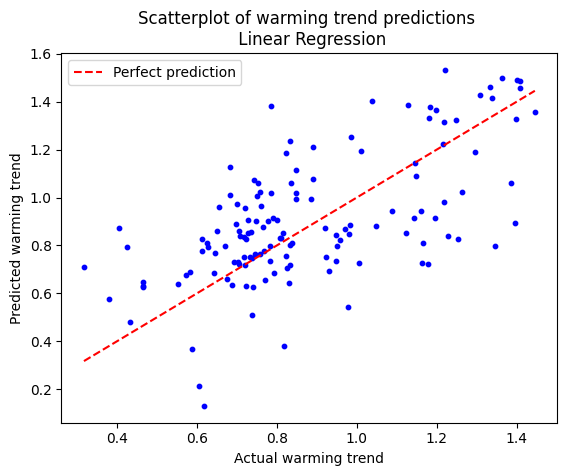

In [35]:
# Create a scatterplot of predictions
plt.scatter(linreg_results["Actual warming trend"], 
            linreg_results["Predicted warming trend"], 
            color='blue', s=10)

# Add a line showing perfect predictions
plt.plot([linreg_results["Actual warming trend"].min(), 
          linreg_results["Actual warming trend"].max()],
         [linreg_results["Actual warming trend"].min(), 
          linreg_results["Actual warming trend"].max()],
         color='red', linestyle='--', label='Perfect prediction')

# Add labels and title
plt.xlabel('Actual warming trend')
plt.ylabel('Predicted warming trend')
plt.title('Scatterplot of warming trend predictions \n Linear Regression')
plt.legend()
#plt.savefig('Scatterplot of warming trend predictions linreg')
plt.show()

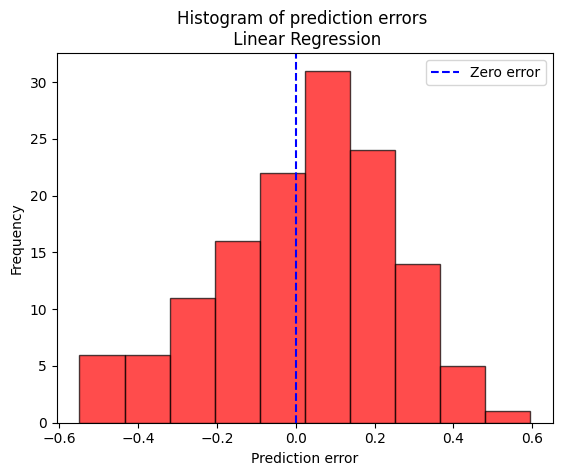

In [36]:
# Create a histogram placing predictions into 10 bins
plt.hist(linreg_results["Prediction error"], bins=10, color='red', edgecolor='black', alpha=0.7)

# Add a red line at zero
plt.axvline(x=0, color='blue', linestyle='--', label='Zero error')

# Add labels and title
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.title('Histogram of prediction errors \n Linear Regression')
plt.legend()
#plt.savefig('Histogram of prediction errors linreg')
plt.show()

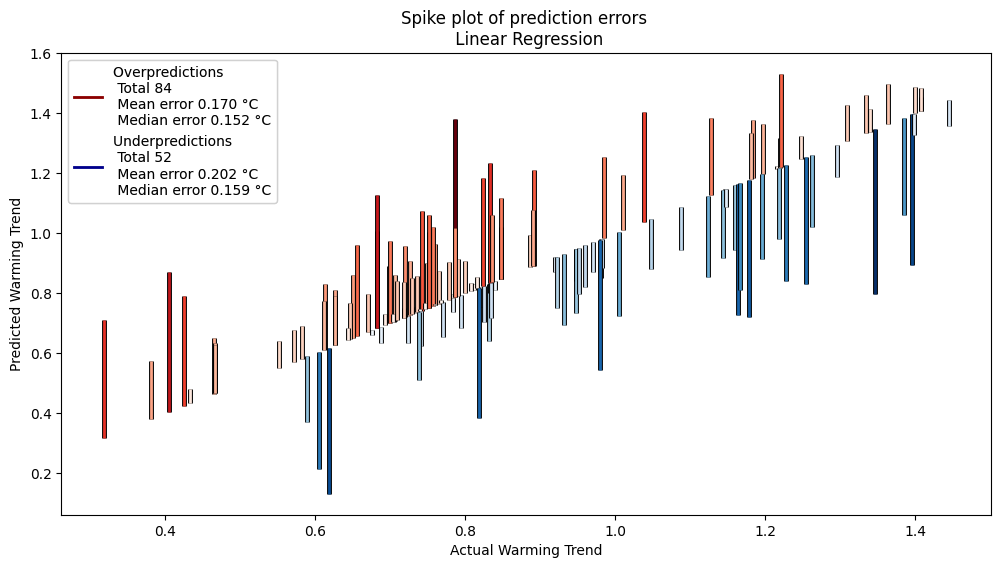

In [38]:
# Create a spike plot of prediction errors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
%matplotlib inline

# Create a figure
plt.figure(figsize=(12, 6))

# Define models and their predictions
predictions = [
    linreg_results["Predicted warming trend"],
]

# Actual values
x_actual = np.array(linreg_results["Actual warming trend"])

# Lists to store the predicted values and errors
overpredictions = []
underpredictions = []
overprediction_errors = []
underprediction_errors = []

# Collect errors for normalization
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        if predicted > actual:
            overpredictions.append(predicted)
            overprediction_errors.append(error)
        else:
            underpredictions.append(predicted)
            underprediction_errors.append(error)

# Normalize errors for color mapping
if overprediction_errors:
    norm_over = mcolors.Normalize(vmin=min(overprediction_errors), vmax=max(overprediction_errors))
if underprediction_errors:
    norm_under = mcolors.Normalize(vmin=min(underprediction_errors), vmax=max(underprediction_errors))

# Plot vertical spike lines with color gradient
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        
        if predicted > actual:
            color = cm.Reds(norm_over(error))  # Darker red for larger errors
        else:
            color = cm.Blues(norm_under(error))  # Darker blue for larger errors
        
        # Thin black border (very thin)
        plt.vlines(x=actual, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
        
        # Main spike line (on top, slightly thinner) with varying shade
        plt.vlines(x=actual, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Compute statistics based on errors
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)
mean_overprediction_error = np.mean(overprediction_errors) if num_overpredictions > 0 else 0
mean_underprediction_error = np.mean(underprediction_errors) if num_underpredictions > 0 else 0
median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overprediction_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean error {mean_underprediction_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Add main legend to the top left
main_legend = plt.legend(handles=[red_line, blue_line], loc='upper left')

plt.gca().add_artist(main_legend)  # Ensure main legend stays

# Labels and title
plt.xlabel('Actual Warming Trend')
plt.ylabel('Predicted Warming Trend')
plt.title('Spike plot of prediction errors \n Linear Regression')

# Show plot
plt.show()

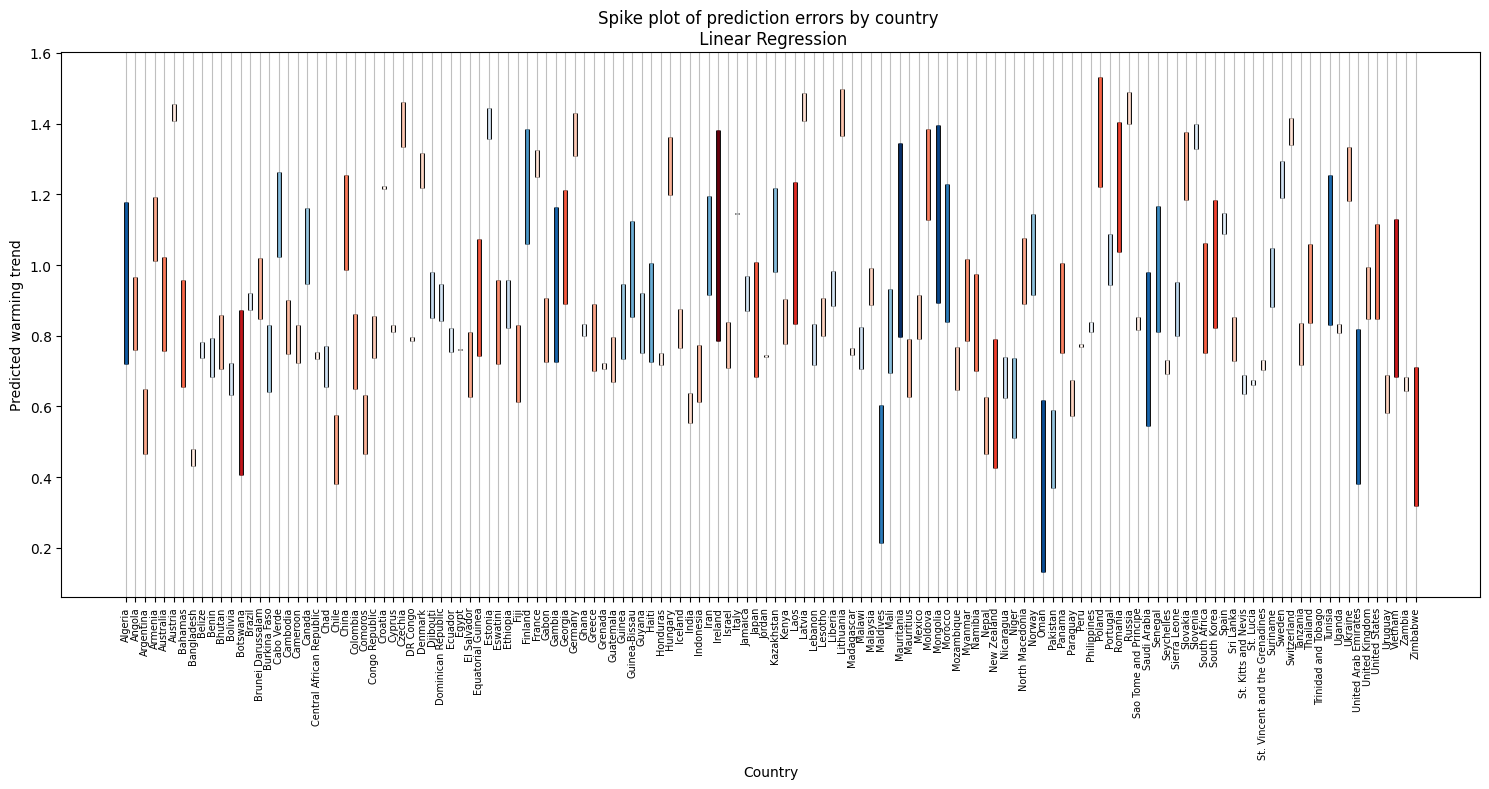

In [39]:
# Create a spike plot of predictions with country labels
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

%matplotlib inline

# Example of how 'x_actual' could be countries for labeling
# Replace 'country_names' with the actual list of country names
country_names = list(linreg_results.index)  # Assuming the countries are in the index of the 'gbr_results'

# Create a figure with increased width
plt.figure(figsize=(15, 8))  # Increase the width of the figure

# Define models and their predictions
predictions = [
    linreg_results["Predicted warming trend"],
]

# Actual values
x_actual = np.array(linreg_results["Actual warming trend"])

# Lists to store the predicted values and errors
overpredictions = []
underpredictions = []
overprediction_errors = []
underprediction_errors = []

# Collect errors for normalization
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        if predicted > actual:
            overpredictions.append(predicted)
            overprediction_errors.append(error)
        else:
            underpredictions.append(predicted)
            underprediction_errors.append(error)

# Normalize errors for color mapping
if overprediction_errors:
    norm_over = mcolors.Normalize(vmin=min(overprediction_errors), vmax=max(overprediction_errors))
if underprediction_errors:
    norm_under = mcolors.Normalize(vmin=min(underprediction_errors), vmax=max(underprediction_errors))

# Plot vertical spike lines with color gradient
for pred in predictions:
    for i, (actual, predicted) in enumerate(zip(x_actual, pred)):
        error = abs(predicted - actual)
        
        if predicted > actual:
            color = cm.Reds(norm_over(error))  # Darker red for larger errors
        else:
            color = cm.Blues(norm_under(error))  # Darker blue for larger errors
        
        # Thin black border (very thin)
        plt.vlines(x=i, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
        
        # Main spike line (on top, slightly thinner) with varying shade
        plt.vlines(x=i, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Compute statistics based on errors
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)
mean_overprediction_error = np.mean(overprediction_errors) if num_overpredictions > 0 else 0
mean_underprediction_error = np.mean(underprediction_errors) if num_underpredictions > 0 else 0
median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overprediction_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean Error {mean_underprediction_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Adjust x-axis to evenly space the countries
plt.xticks(np.arange(0, len(country_names)), country_names, rotation=90, fontsize=7)

# Add gridlines on the x-axis
plt.grid(axis='x', linestyle='-', color='gray', alpha=0.5)

# Labels and title
plt.xlabel('Country')
plt.ylabel('Predicted warming trend')
plt.title('Spike plot of prediction errors by country \n Linear Regression')

# Increase spacing between x-axis labels and adjust layout further
plt.subplots_adjust(bottom=0.3)  # Further increase the bottom margin

# Show plot
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()

# Model 2: Gradient Boosting Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [41]:
# Select relevant columns
target = 'Warming trend since 1992 (°C)'
features = [col for col in climate.columns if col not in ['Country', 'Year', target]]

In [42]:
# Split data into train (1992-2010) and test (2019)
train_data_gbr = climate[(climate['Year'] >= 1992) & (climate['Year'] <= 2010)]
test_data_gbr = climate[climate['Year'] == 2019]

In [43]:
# Prepare X (features) and y (target)
X_train_gbr, y_train_gbr = train_data_gbr[features], train_data_gbr[target]
X_test_gbr, y_test_gbr = test_data_gbr[features], test_data_gbr[target]

In [44]:
# Train the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_gbr, y_train_gbr)

GradientBoostingRegressor(random_state=42)

In [45]:
import joblib

In [46]:
joblib.dump(gbr, 'gbr.joblib')

['gbr.joblib']

In [47]:
joblib.load('gbr.joblib', mmap_mode=None)

GradientBoostingRegressor(random_state=42)

In [49]:
# Predict for 2019
y_pred_gbr = gbr.predict(X_test_gbr)

In [50]:
mean_absolute_error(y_test_gbr, y_pred_gbr)

0.13790289247129595

In [51]:
mean_squared_error(y_test_gbr, y_pred_gbr)

0.030833988995631213

In [52]:
np.sqrt(mean_squared_error(y_test_gbr, y_pred_gbr))

0.17559609618562486

In [53]:
median_absolute_error(y_test_gbr, y_pred_gbr)

0.12067408239737099

### Gradient Booster: Underestimations, overestimations, and accuracy

In [54]:
gbr_results = test_data_gbr[["Country"]].copy()  # Start with country names
gbr_results["Predicted warming trend"] = y_pred_gbr  # Add predicted values
gbr_results["Actual warming trend"] = y_test_gbr.values  # Add actual values
gbr_results["Prediction error"] = gbr_results["Predicted warming trend"] - gbr_results["Actual warming trend"]
gbr_results["Absolute prediction error"] = gbr_results["Prediction error"].abs()
gbr_results.set_index('Country', inplace=True)
gbr_results

,Predicted warming trend,Actual warming trend,Prediction error,Absolute prediction error
Country,,,,
Algeria,0.821622,1.178,-0.356378,0.356378
Angola,0.759474,0.760,-0.000526,0.000526
Argentina,0.463118,0.465,-0.001882,0.001882
Armenia,0.839092,1.010,-0.170908,0.170908
Australia,0.867605,0.757,0.110605,0.110605
...,...,...,...,...
United States,0.837434,0.847,-0.009566,0.009566
Uruguay,0.717401,0.582,0.135401,0.135401
Vietnam,0.887505,0.683,0.204505,0.204505


In [55]:
print(f"Gradient booster prediction summary:")
print(f"\tWarming overestimated: {(gbr_results['Prediction error'] > 0).sum():} countries")
print(f"\t\tAverage overestimation: {(gbr_results.loc[gbr_results["Prediction error"] > 0, "Prediction error"]).mean():.3f}°C")
print(f"\t\tMedian overestimation: {gbr_results[gbr_results['Prediction error'] > 0]['Prediction error'].median():.3f}°C")
print(f"\tWarming underestimated: {(gbr_results['Prediction error'] < 0).sum():} countries")
print(f"\t\tAverage underestimation: {(gbr_results.loc[gbr_results["Prediction error"] < 0, "Prediction error"]).mean():.3f}°C")
print(f"\t\tMedian underestimation: {gbr_results[gbr_results['Prediction error'] < 0]['Prediction error'].median():.3f}°C")

Gradient booster prediction summary:
	Warming overestimated: 49 countries
		Average overestimation: 0.102°C
		Median overestimation: 0.077°C
	Warming underestimated: 87 countries
		Average underestimation: -0.158°C
		Median underestimation: -0.149°C


In [56]:
print("Top 10 highest overestimation errors \n (Gradient Booster):")
for country, underestimation in gbr_results["Prediction error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest overestimation errors 
 (Gradient Booster):
Botswana: 0.452 °C
Zimbabwe: 0.339 °C
New Zealand: 0.249 °C
Greece: 0.219 °C
Bangladesh: 0.212 °C
Bahamas: 0.205 °C
Vietnam: 0.205 °C
Paraguay: 0.197 °C
Ireland: 0.185 °C
Comoros: 0.184 °C


In [57]:
print("Top 10 highest underestimation errors \n (Gradient Booster):")
for country, underestimation in gbr_results["Prediction error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest underestimation errors 
 (Gradient Booster):
Finland: -0.459 °C
Mauritania: -0.447 °C
United Arab Emirates: -0.385 °C
Senegal: -0.38 °C
Algeria: -0.356 °C
Mongolia: -0.346 °C
Ukraine: -0.332 °C
Sweden: -0.328 °C
Germany: -0.328 °C
Latvia: -0.308 °C


In [58]:
print("Top 10 highest absolute errors \n (Gradient Booster):")
for country, underestimation in gbr_results["Absolute prediction error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest absolute errors 
 (Gradient Booster):
Finland: 0.459 °C
Botswana: 0.452 °C
Mauritania: 0.447 °C
United Arab Emirates: 0.385 °C
Senegal: 0.38 °C
Algeria: 0.356 °C
Mongolia: 0.346 °C
Zimbabwe: 0.339 °C
Ukraine: 0.332 °C
Sweden: 0.328 °C


In [59]:
print("Top 10 smallest absolute errors \n (Gradient Booster):")
for country, underestimation in gbr_results["Absolute prediction error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 smallest absolute errors 
 (Gradient Booster):
Angola: 0.001 °C
Myanmar: 0.001 °C
Argentina: 0.002 °C
Sao Tome and Principe: 0.004 °C
Laos: 0.005 °C
Chad: 0.007 °C
Cyprus: 0.008 °C
Uganda: 0.008 °C
United States: 0.01 °C
Fiji: 0.01 °C


### Gradient booster: Visualizations

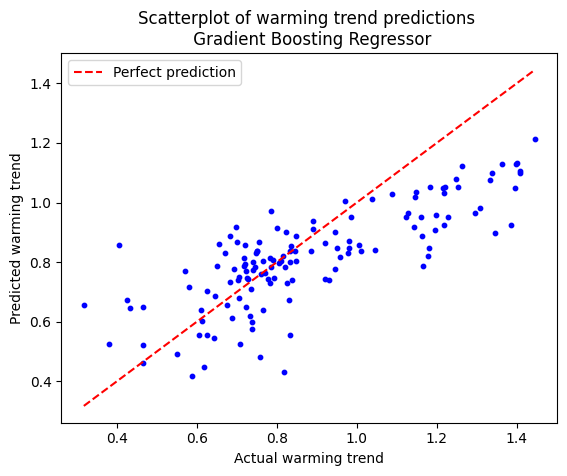

In [60]:
# Create a scatterplot of predictions
plt.scatter(gbr_results["Actual warming trend"], 
            gbr_results["Predicted warming trend"], 
            color='blue', s=10)

# Add a line showing perfect predictions
plt.plot([gbr_results["Actual warming trend"].min(), 
          gbr_results["Actual warming trend"].max()],
         [gbr_results["Actual warming trend"].min(), 
          gbr_results["Actual warming trend"].max()],
         color='red', linestyle='--', label='Perfect prediction')

# Add labels and title
plt.xlabel('Actual warming trend')
plt.ylabel('Predicted warming trend')
plt.title('Scatterplot of warming trend predictions \n Gradient Boosting Regressor')
plt.legend()
#plt.savefig('Scatterplot of warming trend predictions gbr')
plt.show()

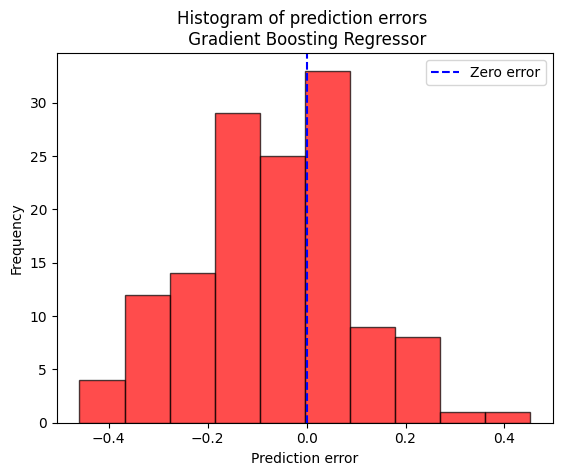

In [61]:
# Create a histogram placing predictions into 10 bins
plt.hist(gbr_results["Prediction error"], bins=10, color='red', edgecolor='black', alpha=0.7)

# Add a red line at zero
plt.axvline(x=0, color='blue', linestyle='--', label='Zero error')

# Add labels and title
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.title('Histogram of prediction errors \n Gradient Boosting Regressor')
plt.legend()
#plt.savefig('Histogram of prediction errors gbr')
plt.show()

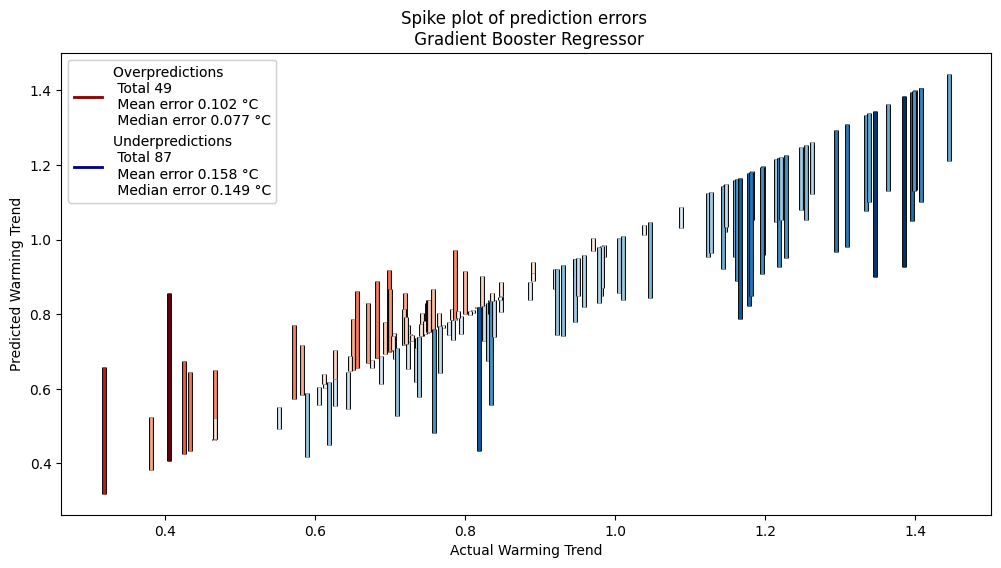

In [62]:
# Create a spike plot of prediction errors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
%matplotlib inline

# Create a figure
plt.figure(figsize=(12, 6))

# Define models and their predictions
predictions = [
    gbr_results["Predicted warming trend"],
]

# Actual values
x_actual = np.array(gbr_results["Actual warming trend"])

# Lists to store the predicted values and errors
overpredictions = []
underpredictions = []
overprediction_errors = []
underprediction_errors = []

# Collect errors for normalization
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        if predicted > actual:
            overpredictions.append(predicted)
            overprediction_errors.append(error)
        else:
            underpredictions.append(predicted)
            underprediction_errors.append(error)

# Normalize errors for color mapping
if overprediction_errors:
    norm_over = mcolors.Normalize(vmin=min(overprediction_errors), vmax=max(overprediction_errors))
if underprediction_errors:
    norm_under = mcolors.Normalize(vmin=min(underprediction_errors), vmax=max(underprediction_errors))

# Plot vertical spike lines with color gradient
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        
        if predicted > actual:
            color = cm.Reds(norm_over(error))  # Darker red for larger errors
        else:
            color = cm.Blues(norm_under(error))  # Darker blue for larger errors
        
        # Thin black border (very thin)
        plt.vlines(x=actual, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
        
        # Main spike line (on top, slightly thinner) with varying shade
        plt.vlines(x=actual, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Compute statistics based on errors
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)
mean_overprediction_error = np.mean(overprediction_errors) if num_overpredictions > 0 else 0
mean_underprediction_error = np.mean(underprediction_errors) if num_underpredictions > 0 else 0
median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overprediction_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean error {mean_underprediction_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Add main legend to the top left
main_legend = plt.legend(handles=[red_line, blue_line], loc='upper left')

plt.gca().add_artist(main_legend)  # Ensure main legend stays

# Labels and title
plt.xlabel('Actual Warming Trend')
plt.ylabel('Predicted Warming Trend')
plt.title('Spike plot of prediction errors \n Gradient Booster Regressor')

# Show plot
plt.show()

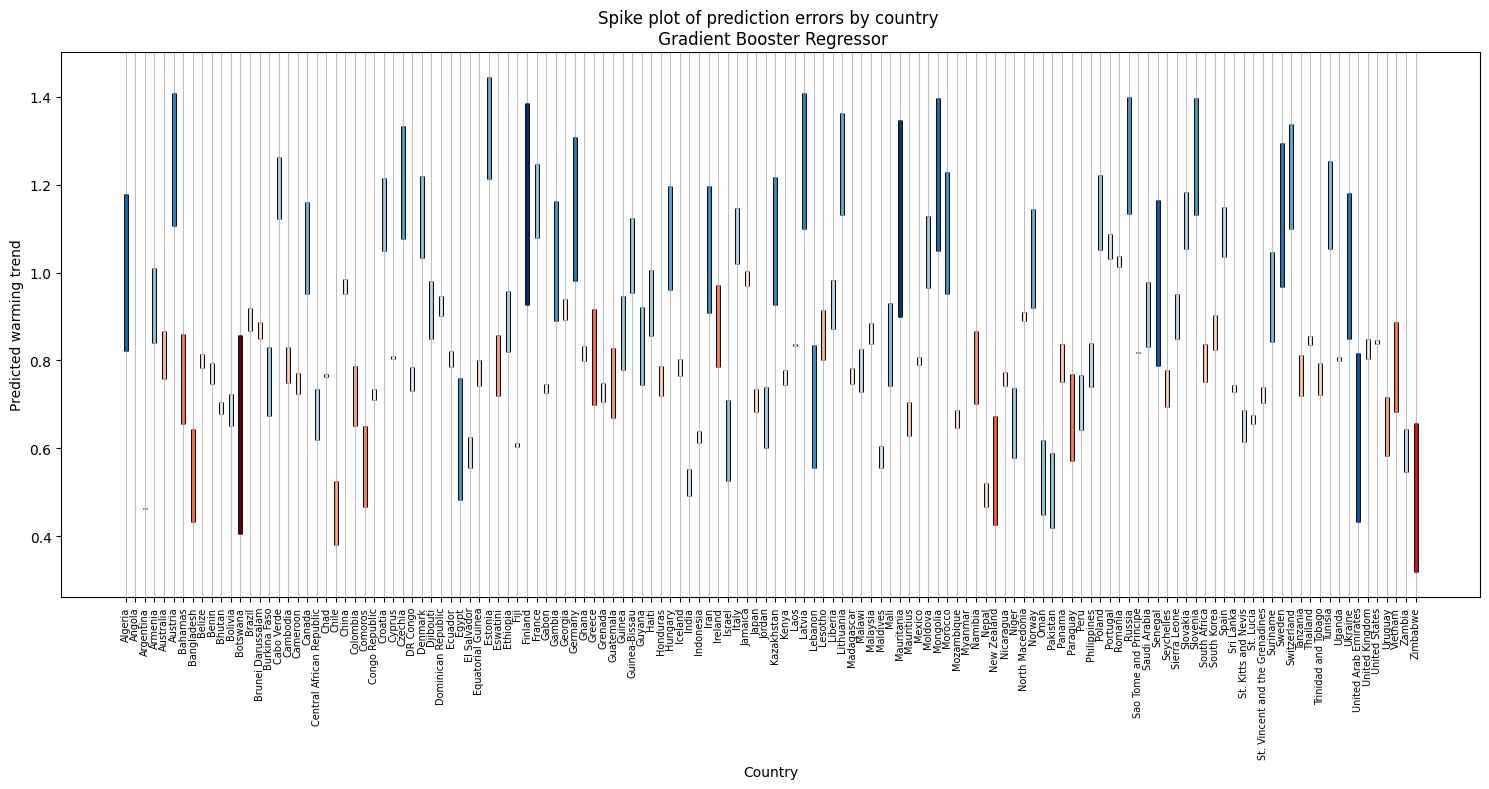

In [63]:
# Create a spike plot of predictions with country labels
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

%matplotlib inline

# Example of how 'x_actual' could be countries for labeling
# Replace 'country_names' with the actual list of country names
country_names = list(gbr_results.index)  # Assuming the countries are in the index of the 'gbr_results'

# Create a figure with increased width
plt.figure(figsize=(15, 8))  # Increase the width of the figure

# Define models and their predictions
predictions = [
    gbr_results["Predicted warming trend"],
]

# Actual values
x_actual = np.array(gbr_results["Actual warming trend"])

# Lists to store the predicted values and errors
overpredictions = []
underpredictions = []
overprediction_errors = []
underprediction_errors = []

# Collect errors for normalization
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        if predicted > actual:
            overpredictions.append(predicted)
            overprediction_errors.append(error)
        else:
            underpredictions.append(predicted)
            underprediction_errors.append(error)

# Normalize errors for color mapping
if overprediction_errors:
    norm_over = mcolors.Normalize(vmin=min(overprediction_errors), vmax=max(overprediction_errors))
if underprediction_errors:
    norm_under = mcolors.Normalize(vmin=min(underprediction_errors), vmax=max(underprediction_errors))

# Plot vertical spike lines with color gradient
for pred in predictions:
    for i, (actual, predicted) in enumerate(zip(x_actual, pred)):
        error = abs(predicted - actual)
        
        if predicted > actual:
            color = cm.Reds(norm_over(error))  # Darker red for larger errors
        else:
            color = cm.Blues(norm_under(error))  # Darker blue for larger errors
        
        # Thin black border (very thin)
        plt.vlines(x=i, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
        
        # Main spike line (on top, slightly thinner) with varying shade
        plt.vlines(x=i, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Compute statistics based on errors
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)
mean_overprediction_error = np.mean(overprediction_errors) if num_overpredictions > 0 else 0
mean_underprediction_error = np.mean(underprediction_errors) if num_underpredictions > 0 else 0
median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overprediction_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean Error {mean_underprediction_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Adjust x-axis to evenly space the countries
plt.xticks(np.arange(0, len(country_names)), country_names, rotation=90, fontsize=7)

# Add gridlines on the x-axis
plt.grid(axis='x', linestyle='-', color='gray', alpha=0.5)

# Labels and title
plt.xlabel('Country')
plt.ylabel('Predicted warming trend')
plt.title('Spike plot of prediction errors by country \n Gradient Booster Regressor')

# Increase spacing between x-axis labels and adjust layout further
plt.subplots_adjust(bottom=0.3)  # Further increase the bottom margin

# Show plot
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()


# Model 3: Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [65]:
# Select relevant columns
target = 'Warming trend since 1992 (°C)'
features = [col for col in climate.columns if col not in ['Country', 'Year', target]]

In [66]:
# Split data into train (1992-2010) and test (2019)
train_data_rfr = climate[(climate['Year'] >= 1992) & (climate['Year'] <= 2010)]
test_data_rfr = climate[climate['Year'] == 2019]

In [67]:
# Prepare X (features) and y (target)
X_train_rfr, y_train_rfr = train_data_rfr[features], train_data_rfr[target]
X_test_rfr, y_test_rfr = test_data_rfr[features], test_data_rfr[target]

### GridSearchCV

In [68]:
rfr_params = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2']  # Number of features to consider for splits
}

In [65]:
rfr = RandomForestRegressor(random_state=42)

In [66]:
rfr_gs = GridSearchCV(estimator=rfr, param_grid=rfr_params, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=1)

In [67]:
%%time
# Fit on training data
rfr_gs.fit(X_train_rfr, y_train_rfr)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 2.21 s, sys: 800 ms, total: 3.01 s
Wall time: 3min 33s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [68]:
#Optional - The GridSearchCV may take a few minutes
#Run this cell while the above is processing
#To play a triumphant fanfare when it finishes
from pydub import AudioSegment
from pydub.playback import play
play(AudioSegment.from_file("Breath of the wild rare item get.mp3"))

Input #0, wav, from '/var/folders/cf/4zrkk0lx1nbdx9tpklpk4jc00000gn/T/tmpaaa37jdu.wav':
  Duration: 00:00:07.31, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


In [69]:
print(rfr_gs.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


Create a model from the parameters chosen by the GridSearchCV.

In [69]:
rfr = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=1,
                      min_samples_split=10, n_estimators=50, random_state=42)

In [70]:
rfr.fit(X_train_rfr,y_train_rfr)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=50, random_state=42)

In [71]:
import joblib

In [73]:
joblib.dump(rfr, 'rfr.joblib')

['rfr.joblib']

In [74]:
joblib.load('rfr.joblib', mmap_mode=None)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=50, random_state=42)

In [75]:
rfr.fit(X_train_rfr,y_train_rfr)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=50, random_state=42)

In [76]:
# Predict for 2019
y_pred_rfr = rfr.predict(X_test_rfr)

In [77]:
mean_squared_error(y_test_rfr, y_pred_rfr)

0.04631047173612482

In [78]:
mean_absolute_error(y_test_rfr, y_pred_rfr)

0.17654056684618022

In [79]:
median_absolute_error(y_test_rfr, y_pred_rfr)

0.1572176405612361

In [80]:
np.sqrt(mean_squared_error(y_test_rfr, y_pred_rfr))

0.21519867968025458

### Underestimations, overestimations, and accuracy

In [81]:
rfr_results = test_data_rfr[["Country"]].copy()  # Start with country names
rfr_results["Predicted warming trend"] = y_pred_rfr  # Add predicted values
rfr_results["Actual warming trend"] = y_test_rfr.values  # Add actual values
rfr_results["Prediction error"] = rfr_results["Predicted warming trend"] - rfr_results["Actual warming trend"]
rfr_results["Absolute prediction error"] = rfr_results["Prediction error"].abs()
rfr_results.set_index('Country', inplace=True)
rfr_results

,Predicted warming trend,Actual warming trend,Prediction error,Absolute prediction error
Country,,,,
Algeria,0.814193,1.178,-0.363807,0.363807
Angola,0.633446,0.760,-0.126554,0.126554
Argentina,0.459005,0.465,-0.005995,0.005995
Armenia,0.698517,1.010,-0.311483,0.311483
Australia,0.805008,0.757,0.048008,0.048008
...,...,...,...,...
United States,0.717474,0.847,-0.129526,0.129526
Uruguay,0.667669,0.582,0.085669,0.085669
Vietnam,0.697095,0.683,0.014095,0.014095


In [82]:
print(f"Random forest prediction summary:")
print(f"\tWarming overestimated: {(rfr_results['Prediction error'] > 0).sum():} countries")
print(f"\t\tAverage overestimation: {(rfr_results.loc[rfr_results["Prediction error"] > 0, "Prediction error"]).mean():.3f}°C")
print(f"\t\tMedian overestimation: {rfr_results[rfr_results['Prediction error'] > 0]['Prediction error'].median():.3f}°C")
print(f"\tWarming underestimated: {(rfr_results['Prediction error'] < 0).sum():} countries")
print(f"\t\tAverage underestimation: {(rfr_results.loc[rfr_results["Prediction error"] < 0, "Prediction error"]).mean():.3f}°C")
print(f"\t\tMedian underestimation: {rfr_results[rfr_results['Prediction error'] < 0]['Prediction error'].median():.3f}°C")

Random forest prediction summary:
	Warming overestimated: 24 countries
		Average overestimation: 0.071°C
		Median overestimation: 0.033°C
	Warming underestimated: 112 countries
		Average underestimation: -0.199°C
		Median underestimation: -0.186°C


In [83]:
print("Top 10 highest overestimation errors \n (Random forest):")
for country, underestimation in rfr_results["Prediction error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest overestimation errors 
 (Random forest):
New Zealand: 0.301 °C
Botswana: 0.225 °C
Bangladesh: 0.186 °C
Zimbabwe: 0.172 °C
Comoros: 0.136 °C
Chile: 0.126 °C
Paraguay: 0.118 °C
Uruguay: 0.086 °C
Ireland: 0.081 °C
Australia: 0.048 °C


In [84]:
print("Top 10 highest underestimation errors \n (Random forest):")
for country, underestimation in rfr_results["Prediction error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest underestimation errors 
 (Random forest):
Mongolia: -0.507 °C
Senegal: -0.469 °C
Russia: -0.459 °C
Finland: -0.429 °C
Lebanon: -0.415 °C
Mauritania: -0.404 °C
Ukraine: -0.394 °C
Kazakhstan: -0.394 °C
Germany: -0.383 °C
Iran: -0.377 °C


In [85]:
print("Top 10 highest absolute errors \n (Random forest):")
for country, underestimation in rfr_results["Absolute prediction error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 highest absolute errors 
 (Random forest):
Mongolia: 0.507 °C
Senegal: 0.469 °C
Russia: 0.459 °C
Finland: 0.429 °C
Lebanon: 0.415 °C
Mauritania: 0.404 °C
Ukraine: 0.394 °C
Kazakhstan: 0.394 °C
Germany: 0.383 °C
Iran: 0.377 °C


In [86]:
print("Top 10 smallest absolute errors \n (Random forest):")
for country, underestimation in rfr_results["Absolute prediction error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Top 10 smallest absolute errors 
 (Random forest):
Trinidad and Tobago: 0.0 °C
Georgia: 0.0 °C
Eswatini: 0.004 °C
El Salvador: 0.005 °C
Argentina: 0.006 °C
Bahamas: 0.011 °C
South Korea: 0.013 °C
Vietnam: 0.014 °C
Indonesia: 0.015 °C
Colombia: 0.016 °C


### Random forest: Visualizations

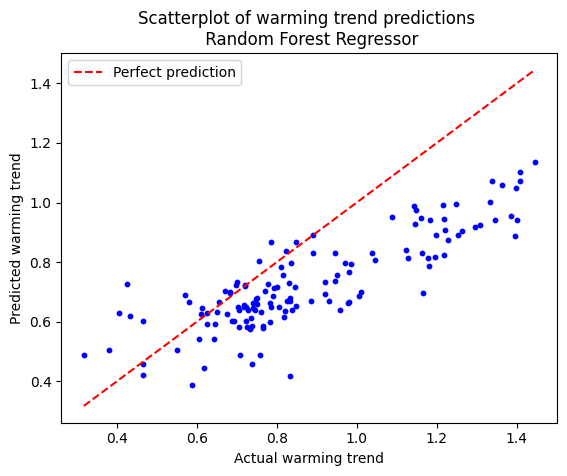

In [88]:
# Create a scatterplot of predictions
plt.scatter(rfr_results["Actual warming trend"], 
            rfr_results["Predicted warming trend"], 
            color='blue', s=10)

# Add a line showing perfect predictions
plt.plot([rfr_results["Actual warming trend"].min(), 
          rfr_results["Actual warming trend"].max()],
         [rfr_results["Actual warming trend"].min(), 
          rfr_results["Actual warming trend"].max()],
         color='red', linestyle='--', label='Perfect prediction')

# Add labels and title
plt.xlabel('Actual warming trend')
plt.ylabel('Predicted warming trend')
plt.title('Scatterplot of warming trend predictions \n Random Forest Regressor')
plt.legend()
#plt.savefig('Scatterplot of warming trend predictions random forest')
plt.show()

### Histogram of overestimation and underestimation

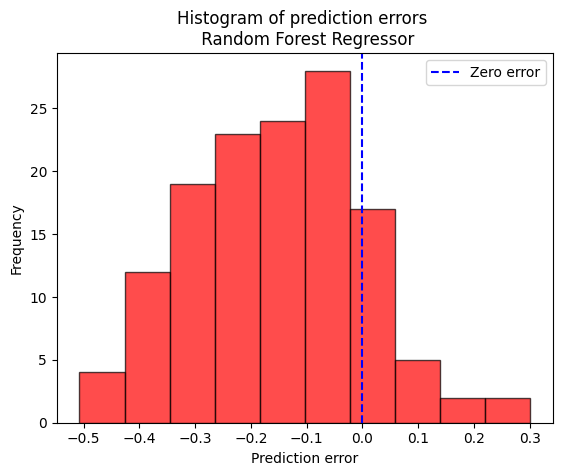

In [89]:
# Create a histogram placing predictions into 10 bins
plt.hist(rfr_results["Prediction error"], bins=10, color='red', edgecolor='black', alpha=0.7)

# Add a red line at zero
plt.axvline(x=0, color='blue', linestyle='--', label='Zero error')

# Add labels and title
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.title('Histogram of prediction errors \n Random Forest Regressor')
plt.legend()
#plt.savefig('Histogram of prediction errors random forest')
plt.show()

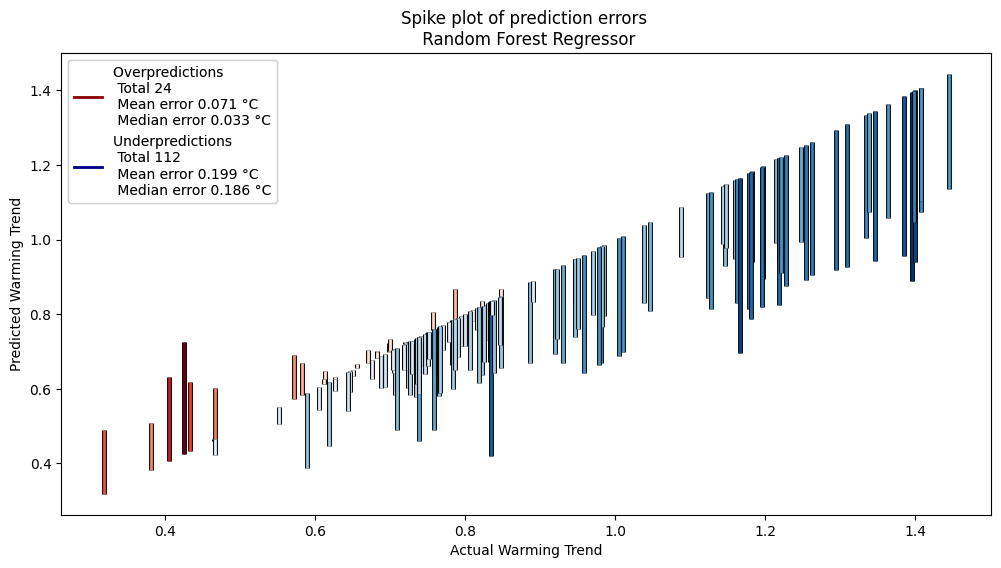

In [91]:
# Create a spike plot of prediction errors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
%matplotlib inline

# Create a figure
plt.figure(figsize=(12, 6))

# Define models and their predictions
predictions = [
    rfr_results["Predicted warming trend"],
]

# Actual values
x_actual = np.array(rfr_results["Actual warming trend"])

# Lists to store the predicted values and errors
overpredictions = []
underpredictions = []
overprediction_errors = []
underprediction_errors = []

# Collect errors for normalization
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        if predicted > actual:
            overpredictions.append(predicted)
            overprediction_errors.append(error)
        else:
            underpredictions.append(predicted)
            underprediction_errors.append(error)

# Normalize errors for color mapping
if overprediction_errors:
    norm_over = mcolors.Normalize(vmin=min(overprediction_errors), vmax=max(overprediction_errors))
if underprediction_errors:
    norm_under = mcolors.Normalize(vmin=min(underprediction_errors), vmax=max(underprediction_errors))

# Plot vertical spike lines with color gradient
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        
        if predicted > actual:
            color = cm.Reds(norm_over(error))  # Darker red for larger errors
        else:
            color = cm.Blues(norm_under(error))  # Darker blue for larger errors
        
        # Thin black border (very thin)
        plt.vlines(x=actual, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
        
        # Main spike line (on top, slightly thinner) with varying shade
        plt.vlines(x=actual, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Compute statistics based on errors
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)
mean_overprediction_error = np.mean(overprediction_errors) if num_overpredictions > 0 else 0
mean_underprediction_error = np.mean(underprediction_errors) if num_underpredictions > 0 else 0
median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overprediction_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean error {mean_underprediction_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Add main legend to the top left
main_legend = plt.legend(handles=[red_line, blue_line], loc='upper left')

plt.gca().add_artist(main_legend)  # Ensure main legend stays

# Labels and title
plt.xlabel('Actual Warming Trend')
plt.ylabel('Predicted Warming Trend')
plt.title('Spike plot of prediction errors \n Random Forest Regressor')

# Show plot
plt.show()

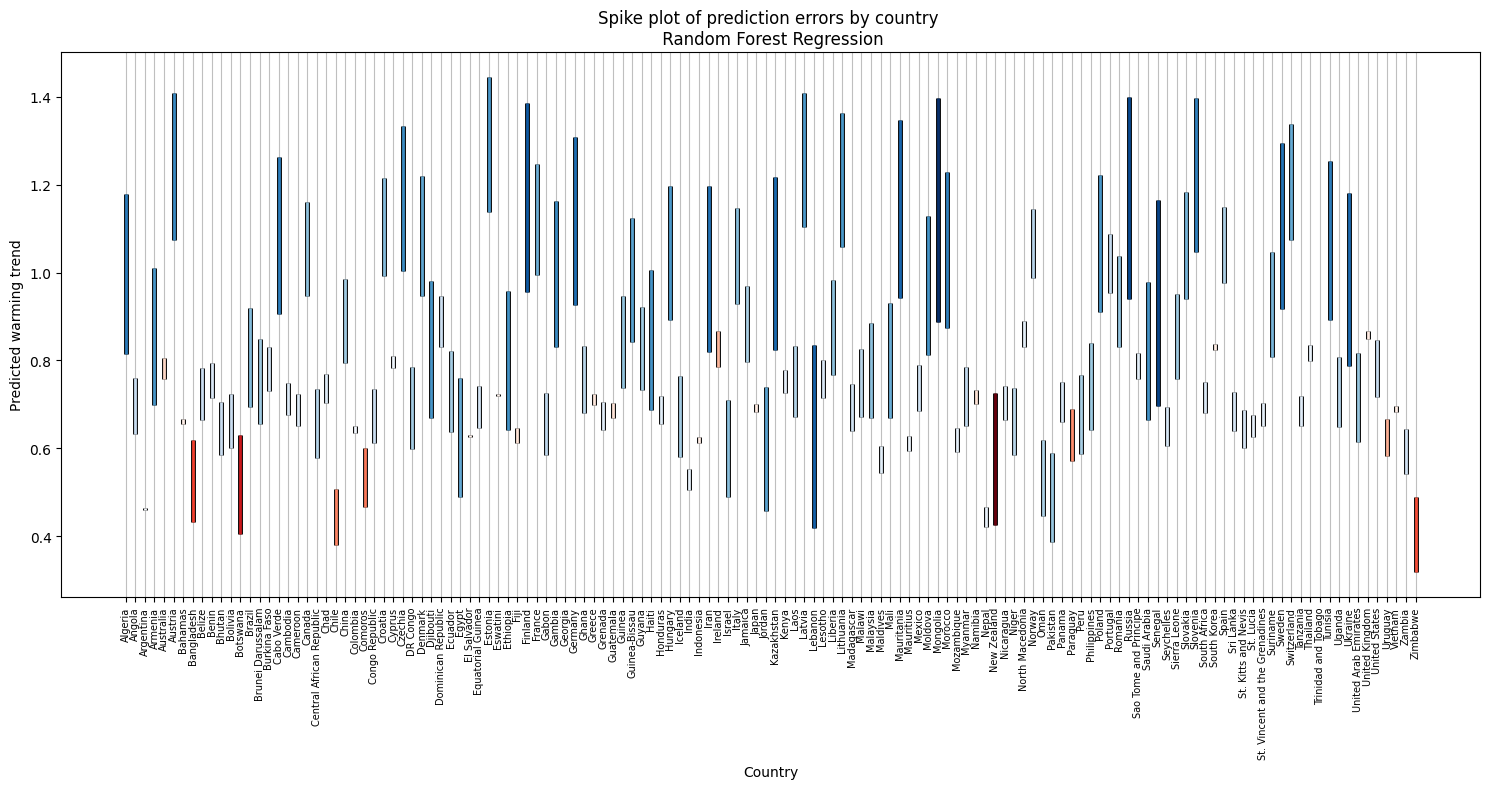

In [92]:
# Create a spike plot of predictions with country labels
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

%matplotlib inline

# Example of how 'x_actual' could be countries for labeling
# Replace 'country_names' with the actual list of country names
country_names = list(gbr_results.index)  # Assuming the countries are in the index of the 'gbr_results'

# Create a figure with increased width
plt.figure(figsize=(15, 8))  # Increase the width of the figure

# Define models and their predictions
predictions = [
    rfr_results["Predicted warming trend"],
]

# Actual values
x_actual = np.array(rfr_results["Actual warming trend"])

# Lists to store the predicted values and errors
overpredictions = []
underpredictions = []
overprediction_errors = []
underprediction_errors = []

# Collect errors for normalization
for pred in predictions:
    for actual, predicted in zip(x_actual, pred):
        error = abs(predicted - actual)
        if predicted > actual:
            overpredictions.append(predicted)
            overprediction_errors.append(error)
        else:
            underpredictions.append(predicted)
            underprediction_errors.append(error)

# Normalize errors for color mapping
if overprediction_errors:
    norm_over = mcolors.Normalize(vmin=min(overprediction_errors), vmax=max(overprediction_errors))
if underprediction_errors:
    norm_under = mcolors.Normalize(vmin=min(underprediction_errors), vmax=max(underprediction_errors))

# Plot vertical spike lines with color gradient
for pred in predictions:
    for i, (actual, predicted) in enumerate(zip(x_actual, pred)):
        error = abs(predicted - actual)
        
        if predicted > actual:
            color = cm.Reds(norm_over(error))  # Darker red for larger errors
        else:
            color = cm.Blues(norm_under(error))  # Darker blue for larger errors
        
        # Thin black border (very thin)
        plt.vlines(x=i, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
        
        # Main spike line (on top, slightly thinner) with varying shade
        plt.vlines(x=i, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Compute statistics based on errors
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)
mean_overprediction_error = np.mean(overprediction_errors) if num_overpredictions > 0 else 0
mean_underprediction_error = np.mean(underprediction_errors) if num_underpredictions > 0 else 0
median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overprediction_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean Error {mean_underprediction_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Adjust x-axis to evenly space the countries
plt.xticks(np.arange(0, len(country_names)), country_names, rotation=90, fontsize=7)

# Add gridlines on the x-axis
plt.grid(axis='x', linestyle='-', color='gray', alpha=0.5)

# Labels and title
plt.xlabel('Country')
plt.ylabel('Predicted warming trend')
plt.title('Spike plot of prediction errors by country \n Random Forest Regression')

# Increase spacing between x-axis labels and adjust layout further
plt.subplots_adjust(bottom=0.3)  # Further increase the bottom margin

# Show plot
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()

# Comparing the three models

Have a country in mind? Look them up below to see how predictions fared!

In [93]:
# Run this cell to define the lookup function. You can leave it collapsed if you like.
actual_trend = climate.loc[climate['Year'] == 2019, ['Country', 'Warming trend since 1992 (°C)']]
actual_trend.set_index("Country", inplace=True)

linreg_pred_trend = (linreg_results['Predicted warming trend']).to_frame()
gbr_pred_trend = (gbr_results['Predicted warming trend']).to_frame()
rfr_pred_trend = (rfr_results['Predicted warming trend']).to_frame()

def lookup_warming_trends(country):
    try:
        data = {
            "Actual warming trend (°C)": actual_trend.loc[country, "Warming trend since 1992 (°C)"],
            "Linear regression prediction (°C)": linreg_pred_trend.loc[country, "Predicted warming trend"],
            "Gradient booster prediction (°C)": gbr_pred_trend.loc[country, "Predicted warming trend"],
            "Random forest prediction (°C)": rfr_pred_trend.loc[country, "Predicted warming trend"],
        }
        return pd.DataFrame(data, index=[country])
    except KeyError:
        print(f"Country '{country}' not found in dataset \n May have been cut during cleaning or does not exist \n Check spelling")

In [95]:
# Enter your country in the quotes
lookup_warming_trends("Canada")

,Actual warming trend (°C),Linear regression prediction (°C),Gradient booster prediction (°C),Random forest prediction (°C)
Canada,1.16,0.945,0.951961,0.947149


Let's make a few visualizations showing the predictions from all three in context with each other

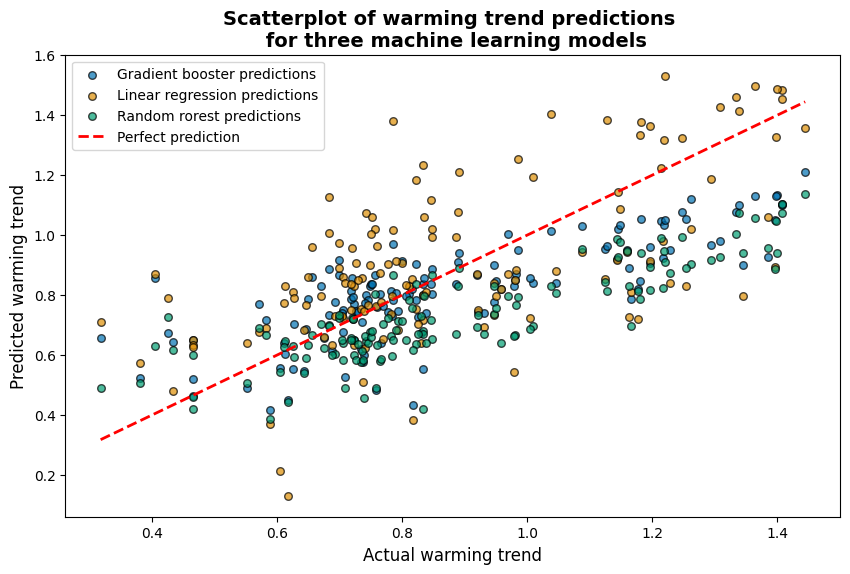

In [96]:
# Create a combined scatterplot for all three models

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define a colorblind-friendly palette
colors = sns.color_palette("colorblind", 3)

# Plot Gradient Boosting results
plt.scatter(gbr_results["Actual warming trend"], 
            gbr_results["Predicted warming trend"], 
            color=colors[0], s=30, alpha=0.7, edgecolor='black', label='Gradient booster predictions')

# Plot Linear Regression results
plt.scatter(linreg_results["Actual warming trend"], 
            linreg_results["Predicted warming trend"], 
            color=colors[1], s=30, alpha=0.7, edgecolor='black', label='Linear regression predictions')

# Plot Random Forest results
plt.scatter(rfr_results["Actual warming trend"], 
            rfr_results["Predicted warming trend"], 
            color=colors[2], s=30, alpha=0.7, edgecolor='black', label='Random rorest predictions')

# Add a perfect prediction line
plt.plot([gbr_results["Actual warming trend"].min(), 
          gbr_results["Actual warming trend"].max()],
         [gbr_results["Actual warming trend"].min(), 
          gbr_results["Actual warming trend"].max()],
         color='red', linestyle='--', linewidth=2, label='Perfect prediction')

# Add labels and title with better formatting
plt.xlabel('Actual warming trend', fontsize=12)
plt.ylabel('Predicted warming trend', fontsize=12)
plt.title('Scatterplot of warming trend predictions \n for three machine learning models', fontsize=14, fontweight='bold')

# Add a legend
plt.legend(loc='upper left', fontsize=10, frameon=True)

# Show the plot
plt.show()

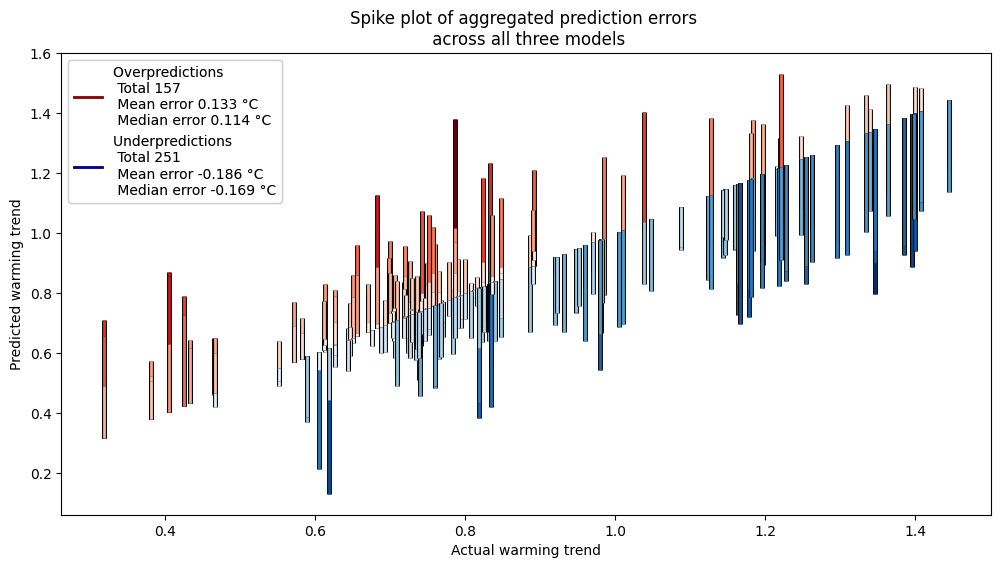

In [99]:
# Create a spike plot of all three models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
%matplotlib inline

# Create a figure
plt.figure(figsize=(12, 6))

# Aggregate all prediction errors
prediction_errors = np.concatenate([
    linreg_results['Prediction error'],
    gbr_results['Prediction error'],
    rfr_results['Prediction error']
])

# Actual values (assuming they are the same across models)
x_actual = np.tile(np.array(gbr_results["Actual warming trend"]), 3)  # Repeat for all models

# Lists to store overpredictions and underpredictions
overprediction_errors = prediction_errors[prediction_errors > 0]
underprediction_errors = prediction_errors[prediction_errors < 0]

# Compute statistics correctly
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)

mean_overestimation_error = overprediction_errors.sum() / num_overpredictions if num_overpredictions > 0 else 0
mean_underestimation_error = underprediction_errors.sum() / num_underpredictions if num_underpredictions > 0 else 0

median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Normalize errors for color mapping
if num_overpredictions > 0:
    norm_over = mcolors.Normalize(vmin=overprediction_errors.min(), vmax=overprediction_errors.max())
if num_underpredictions > 0:
    norm_under = mcolors.Normalize(vmin=abs(underprediction_errors).min(), vmax=abs(underprediction_errors).max())

# Plot vertical spike lines with color gradient
for error, actual in zip(prediction_errors, x_actual):
    predicted = actual + error
    abs_error = abs(error)
    
    if error > 0:
        color = cm.Reds(norm_over(abs_error))  # Darker red for larger errors
    else:
        color = cm.Blues(norm_under(abs_error))  # Darker blue for larger errors
    
    # Thin black border
    plt.vlines(x=actual, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
    
    # Main spike line with varying shade
    plt.vlines(x=actual, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overestimation_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean error {mean_underestimation_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Add main legend to the top left
main_legend = plt.legend(handles=[red_line, blue_line], loc='upper left')
plt.gca().add_artist(main_legend)  # Ensure main legend stays

# Labels and title
plt.xlabel('Actual warming trend')
plt.ylabel('Predicted warming trend')
plt.title('Spike plot of aggregated prediction errors \n across all three models')

# Show plot
plt.show()

Each country has all three of its predictions "stacked" at the same point along the y axis. A colormap has been applied so that larger errors are displayed with darker colors, and smaller errors with lighter colors, allowing us to see them all together while still keeping them distinguishable. Extremely small errors, or ones extremely similar to another error, may not be visible at this scale.

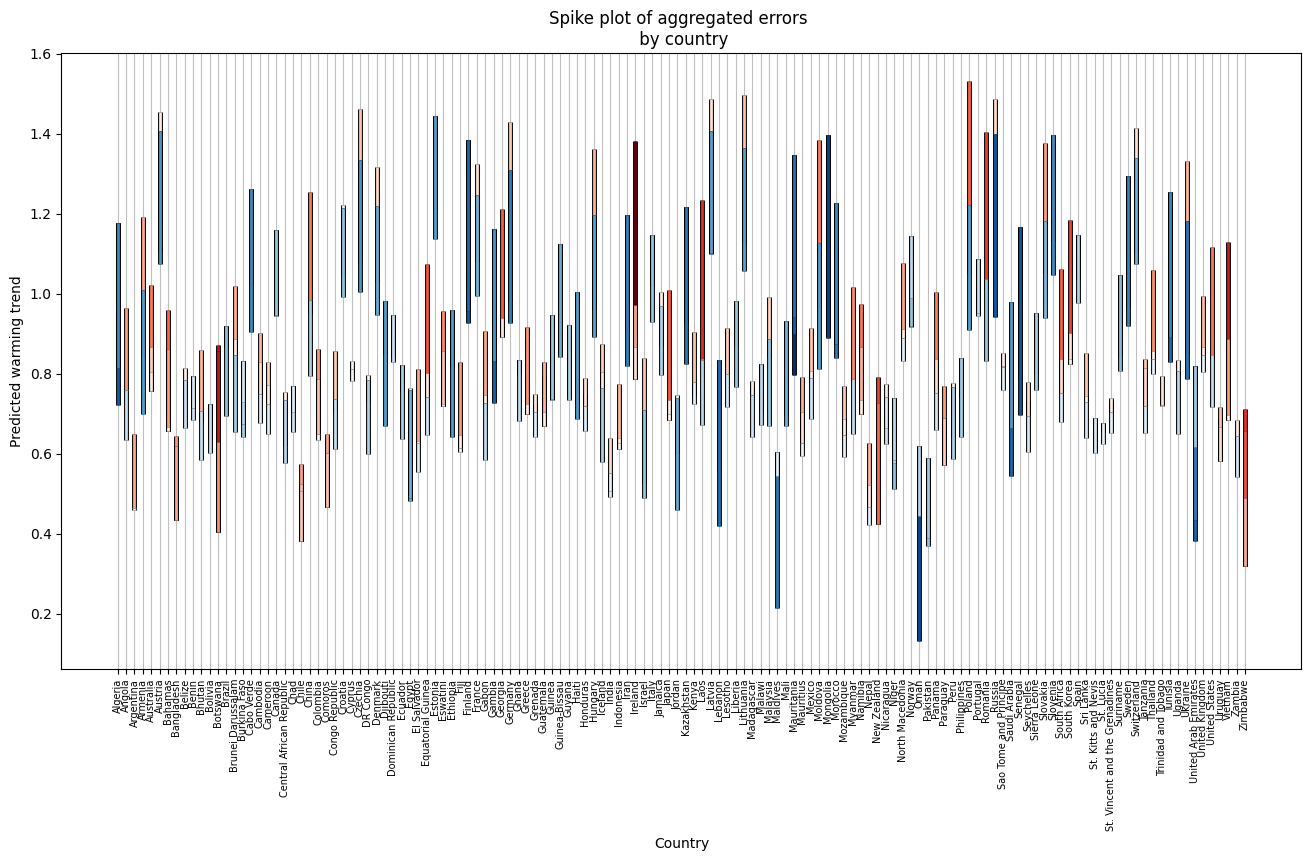

In [100]:
# Create a spike plot of all predictions aligned by country 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
%matplotlib inline

# Create a figure with increased width
plt.figure(figsize=(16, 8))  # Increase the width of the figure

# Aggregate all prediction errors
prediction_errors = np.concatenate([
    linreg_results['Prediction error'],
    gbr_results['Prediction error'],
    rfr_results['Prediction error']
])

# Actual values (assuming they are the same across models)
x_actual = np.tile(np.array(gbr_results["Actual warming trend"]), 3)  # Repeat for all models

# Ensure that prediction_errors and x_actual match the length of country_names
num_countries = len(gbr_results)  # Assuming each country is listed once in gbr_results
assert len(prediction_errors) == len(x_actual) == num_countries * 3, "Data length mismatch!"

# Lists to store overpredictions and underpredictions
overprediction_errors = prediction_errors[prediction_errors > 0]
underprediction_errors = prediction_errors[prediction_errors < 0]

# Compute statistics correctly
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)

mean_overestimation_error = overprediction_errors.sum() / num_overpredictions if num_overpredictions > 0 else 0
mean_underestimation_error = underprediction_errors.sum() / num_underpredictions if num_underpredictions > 0 else 0

median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Normalize errors for color mapping
if num_overpredictions > 0:
    norm_over = mcolors.Normalize(vmin=overprediction_errors.min(), vmax=overprediction_errors.max())
if num_underpredictions > 0:
    norm_under = mcolors.Normalize(vmin=abs(underprediction_errors).min(), vmax=abs(underprediction_errors).max())

# Adjust positions to align spikes correctly with country names
x_positions = np.arange(num_countries)  # Generate the x-positions for the countries

# Plot vertical spike lines with color gradient
for i, (error, actual) in enumerate(zip(prediction_errors, x_actual)):
    predicted = actual + error
    abs_error = abs(error)
    
    if error > 0:
        color = cm.Reds(norm_over(abs_error))  # Darker red for larger errors
    else:
        color = cm.Blues(norm_under(abs_error))  # Darker blue for larger errors
    
    # Thin black border
    plt.vlines(x=x_positions[i % num_countries], ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
    
    # Main spike line with varying shade
    plt.vlines(x=x_positions[i % num_countries], ymin=actual, ymax=predicted, color=color, linewidth=2)

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overprediction_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean Error {mean_underprediction_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Adjust x-axis to evenly space the countries
plt.xticks(x_positions, country_names, rotation=90, fontsize=7)

# Add gridlines on the x-axis
plt.grid(axis='x', linestyle='-', color='gray', alpha=0.5)

# Labels and title
plt.xlabel('Country')
plt.ylabel('Predicted warming trend')
plt.title('Spike plot of aggregated errors \n by country')

# Show plot
plt.show()

Which countries had the largest average errors between all three models?

In [101]:
# Create a new DataFrame to directly compare our predictions
combined_prediction_errors = pd.DataFrame({
    'Linear Regression Error': linreg_results['Prediction error'],
    'Random Forest Regression Error': rfr_results['Prediction error'],
    'Gradient Boosting Regression Error': gbr_results['Prediction error']
})

# Create a new column for the average of the three prediction errors
combined_prediction_errors['Average Prediction Error'] = combined_prediction_errors.mean(axis=1)

# Calculate the average of absolute errors
# For instance, (5, -3, and -1) would be treated as (5, 3, and 1)
combined_prediction_errors['Average Absolute Prediction Error'] = combined_prediction_errors[['Linear Regression Error', 
                                                                                'Random Forest Regression Error', 
                                                                                'Gradient Boosting Regression Error']].abs().mean(axis=1)

combined_prediction_errors

,Linear Regression Error,Random Forest Regression Error,Gradient Boosting Regression Error,Average Prediction Error,Average Absolute Prediction Error
Country,,,,,
Algeria,-0.457,-0.363807,-0.356378,-0.392395,0.392395
Angola,0.205,-0.126554,-0.000526,0.025973,0.110693
Argentina,0.184,-0.005995,-0.001882,0.058707,0.063959
Armenia,0.183,-0.311483,-0.170908,-0.099797,0.221797
Australia,0.265,0.048008,0.110605,0.141204,0.141204
...,...,...,...,...,...
United States,0.269,-0.129526,-0.009566,0.043303,0.136031
Uruguay,0.107,0.085669,0.135401,0.109357,0.109357
Vietnam,0.446,0.014095,0.204505,0.221533,0.221533


In [102]:
combined_prediction_errors['Average Prediction Error'].mean()

-0.06275794384903476

In [103]:
combined_prediction_errors['Average Absolute Prediction Error'].mean()

0.16549095702739403

In [104]:
print("Largest average overestimations \n across all three models:")
for country, underestimation in combined_prediction_errors["Average Prediction Error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Largest average overestimations 
 across all three models:
Botswana: 0.382 °C
New Zealand: 0.306 °C
Zimbabwe: 0.301 °C
Ireland: 0.287 °C
Vietnam: 0.222 °C
Bahamas: 0.173 °C
Comoros: 0.162 °C
Namibia: 0.158 °C
Chile: 0.155 °C
South Korea: 0.151 °C


In [105]:
print("Largest average underestimations \n across all three models:")
for country, underestimation in combined_prediction_errors["Average Prediction Error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Largest average underestimations 
 across all three models:
Mauritania: -0.467 °C
Mongolia: -0.452 °C
Finland: -0.404 °C
Senegal: -0.402 °C
Algeria: -0.392 °C
Gambia: -0.347 °C
United Arab Emirates: -0.341 °C
Morocco: -0.34 °C
Tunisia: -0.329 °C
Iran: -0.316 °C


In [106]:
print("Largest absolute average errors \n across all three models:")
for country, underestimation in combined_prediction_errors["Average Absolute Prediction Error"].nlargest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Largest absolute average errors 
 across all three models:
Mauritania: 0.467 °C
Mongolia: 0.452 °C
Finland: 0.404 °C
Senegal: 0.402 °C
Algeria: 0.392 °C
Botswana: 0.382 °C
Gambia: 0.347 °C
United Arab Emirates: 0.341 °C
Morocco: 0.34 °C
Tunisia: 0.329 °C


In [107]:
print("Smallest absolute average errors \n across all three models:")
for country, underestimation in combined_prediction_errors["Average Absolute Prediction Error"].nsmallest(10).items():
    print(f"{country}: {round(underestimation, 3)}", "°C")

Smallest absolute average errors 
 across all three models:
Cyprus: 0.019 °C
Trinidad and Tobago: 0.025 °C
St. Lucia: 0.029 °C
Sao Tome and Principe: 0.033 °C
St. Vincent and the Grenadines: 0.039 °C
Grenada: 0.042 °C
Madagascar: 0.054 °C
Honduras: 0.055 °C
Chad: 0.063 °C
Argentina: 0.064 °C


What factors may be correlated to a higher error?

In [108]:
# Create a new DataFrame combining 2019 values for all columns with prediction errors
year2019 = climate[climate['Year'] == 2019]
year2019withpreds = year2019.copy()
year2019withpreds.set_index('Country', inplace=True)
year2019withpreds['Average Prediction Error'] = combined_prediction_errors['Average Prediction Error']
year2019withpreds['Average Absolute Prediction Error'] = combined_prediction_errors['Average Absolute Prediction Error']
year2019withpreds

# Drop non-numeric columns
corr_to_error = year2019withpreds.select_dtypes(include=['number'])

# Compute correlation with target column
correlation_series_dos = corr_to_error.corr()['Average Prediction Error'].dropna()

# Get columns sorted by absolute correlation value in descending order
corr_rank_by_error = correlation_series_dos.abs().sort_values(ascending=False).index.to_numpy()

corr_rank_by_error

array(['Average Prediction Error', 'Warming trend since 1992 (°C)',
       'Average Absolute Prediction Error',
       'Barren land (% of total land area)',
       'Sex ratio (males per 100 females)',
       'Percent of births by women 15 to 19', 'Share of forest area',
       'Temperature deviation from 1951-80 norms (°C)',
       'CO2 emissions per capita', 'GDP per capita (% of 1992)',
       'Fertility rate', 'Net Migration Rate (per 1,000 population)',
       'Climate altering land cover (% of 2015)',
       'Greenhouse gases per capita', 'CO2 emissions from oil per capita',
       'Energy use per capita', 'Population density (sq km)',
       'Adjusted GDP in USD', 'Carbon stocks in forests (% of 1992)',
       'Population', 'Land area (1000 HA)',
       'Share of global CO2 emissions', 'CO2 emissions',
       'Inland water bodies (% of total land area)',
       'Life expectancy at birth',
       'CO2 emissions per capita (yearly change)',
       'Forest area (% of 1992)', 'Forest

# Future Predictions
The Linear Regression was our best-performing model, with the lowest Mean Absolute Error and the best balance between Overpredictions and Underpredictions. So let's use it to predict the warming trend in 2050. This time we'll use the full 1992 to 2019 dataset for training. 

First we will load our dataset and some libraries directly, so you can start here if the kernel is restarted.

In [109]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

climate = pd.read_csv("/Users/matthewcavanaugh/Desktop/Data analysis work/Data projects/Using machine learning to predict climate change/Finished files/climate population and gdp data.csv")
climate

,Country,Year,Adjusted GDP in USD,GDP per capita,GDP per capita (% of 1992),Population,Population density (sq km),Sex ratio (males per 100 females),Population growth rate,Life expectancy at birth,...,CO2 from land use change per capita,CO2 emissions from oil per capita,Greenhouse gases per capita,Energy use per capita,Share of global CO2 emissions,CO2 emissions,CO2 emissions per capita,CO2 emissions per capita (yearly change),Temperature deviation from 1951-80 norms (°C),Warming trend since 1992 (°C)
0,Algeria,1992,244668703125,9188.204,100.000,26628568.0,11180.0,106.253,2.521,67.725,...,0.503,1.077,6.204,11971.857,0.355,79.883,3.000,-0.032,-0.312,-0.312
1,Algeria,1993,234160281250,8584.517,93.430,27277048.0,11453.0,106.286,2.294,67.797,...,0.365,1.026,6.271,10893.888,0.360,81.944,3.004,0.004,0.552,0.120
2,Algeria,1994,235861046875,8457.657,92.049,27887279.0,11709.0,106.323,2.133,67.284,...,0.262,1.092,6.277,10807.210,0.385,88.608,3.177,0.173,0.732,0.324
3,Algeria,1995,247243218750,8684.284,94.516,28470191.0,11954.0,106.376,2.005,67.691,...,0.399,0.951,6.764,10996.017,0.411,96.777,3.399,0.222,0.595,0.392
4,Algeria,1996,260883562500,8985.746,97.797,29033044.0,12190.0,106.459,1.911,68.219,...,0.281,0.944,6.777,10692.724,0.412,100.039,3.446,0.047,0.846,0.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,Zimbabwe,2015,39798644531,2763.984,49.166,14399013.0,37221.0,89.738,1.347,58.989,...,0.869,0.261,2.599,3860.920,0.034,12.017,0.835,-0.006,0.970,0.257
3804,Zimbabwe,2016,40963191406,2805.642,49.907,14600294.0,37741.0,89.848,1.429,59.760,...,0.823,0.233,2.381,3227.680,0.030,10.581,0.725,-0.110,1.270,0.298
3805,Zimbabwe,2017,44316742187,2991.851,53.220,14812482.0,38290.0,89.968,1.457,60.263,...,0.762,0.227,2.388,3068.011,0.027,9.827,0.663,-0.062,0.088,0.290
3806,Zimbabwe,2018,43420898437,2888.093,51.374,15034452.0,38864.0,90.093,1.518,60.906,...,0.685,0.277,2.376,3441.986,0.031,11.205,0.745,0.082,0.453,0.296


In [110]:
# Filter data for years between 1992 and 2019
train_data = climate[(climate['Year'] >= 1992) & (climate['Year'] <= 2019)]

In [111]:
# Define features (X) and target (y)
X_train = train_data.drop(columns=['Country', 'Year', 'Warming trend since 1992 (°C)'])
y_train = train_data['Warming trend since 1992 (°C)']

In [112]:
# Load our saved model from earlier
gbr = joblib.load('gbr.joblib', mmap_mode=None)

In [113]:
# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [114]:
# Prepare the data for the year 2050 (we'll need the features for 2050)
# Assuming you have or can generate feature data for the year 2050
X_2050 = climate[(climate['Year'] == 2019)].drop(columns=['Country', 'Year', 'Warming trend since 1992 (°C)'])

In [115]:
# Predict the 'Warming trend (°C)' for 2050
y_2050_pred = gbr.predict(X_2050)

In [116]:
# Get the actual 'Warming trend (°C)' for 2019 (baseline year)
baseline_temp_2019 = climate[climate['Year'] == 2019]['Warming trend since 1992 (°C)']

In [117]:
# Add the predicted change to the 2019 value to get the warming trend for 2050
predicted_temp_2050 = baseline_temp_2019.values + y_2050_pred

In [118]:
# Create a DataFrame with the predicted values for 2050
y_2050_pred_df = pd.DataFrame({
    'Country': climate[climate['Year'] == 2019]['Country'],
    'Predicted warming trend in 2050': predicted_temp_2050
})

In [119]:
y_2050_pred_df.set_index('Country', inplace=True)

In [120]:
y_2050_pred_df

,Predicted warming trend in 2050
Country,
Algeria,2.214405
Angola,1.585035
Argentina,0.955295
Armenia,1.914928
Australia,1.583917
...,...
United States,1.650818
Uruguay,1.228963
Vietnam,1.513925


In [121]:
print("Top 15 countries expected to warm the most by 2050 \n on average from historical norms:")
for country, underestimation in y_2050_pred_df['Predicted warming trend in 2050'].nlargest(15).items():
    fahrenheit = (underestimation * 9/5)  # Only apply conversion to the warming trend
    print(f"{country}: {round(underestimation, 3)}°C / {round(fahrenheit, 3)}°F")

Top 15 countries expected to warm the most by 2050 
 on average from historical norms:
Estonia: 2.764°C / 4.975°F
Mongolia: 2.702°C / 4.864°F
Slovenia: 2.666°C / 4.799°F
Austria: 2.663°C / 4.794°F
Latvia: 2.661°C / 4.789°F
Russia: 2.655°C / 4.779°F
Lithuania: 2.579°C / 4.643°F
Finland: 2.549°C / 4.588°F
Czechia: 2.533°C / 4.559°F
Switzerland: 2.528°C / 4.551°F
Mauritania: 2.504°C / 4.507°F
Germany: 2.493°C / 4.487°F
Cabo Verde: 2.487°C / 4.476°F
Sweden: 2.43°C / 4.374°F
France: 2.421°C / 4.358°F


In [122]:
print("Top 15 countries expected to warm the least by 2050 \n on average from historical norms:")
for country, underestimation in y_2050_pred_df['Predicted warming trend in 2050'].nsmallest(15).items():
    fahrenheit = (underestimation * 9/5)  # Apply conversion to the warming trend
    print(f"{country}: {round(underestimation, 3)}°C / {round(fahrenheit, 3)}°F")

Top 15 countries expected to warm the least by 2050 
 on average from historical norms:
Chile: 0.824°C / 1.483°F
Zimbabwe: 0.862°C / 1.552°F
New Zealand: 0.939°C / 1.69°F
Argentina: 0.955°C / 1.72°F
Nepal: 0.991°C / 1.783°F
Bangladesh: 1.066°C / 1.919°F
Comoros: 1.07°C / 1.926°F
India: 1.071°C / 1.928°F
Pakistan: 1.081°C / 1.946°F
Oman: 1.083°C / 1.95°F
Botswana: 1.169°C / 2.104°F
Maldives: 1.208°C / 2.174°F
El Salvador: 1.218°C / 2.192°F
Uruguay: 1.229°C / 2.212°F
Zambia: 1.245°C / 2.241°F


In [123]:
# Thresholds of predicted warming by number of countries
print("Countries expected to warm over 3°C:", "\n", ((y_2050_pred_df['Predicted warming trend in 2050'] > 3).sum()))
print("Countries expected to warm between 2.5 and 3°C:", "\n", (len(y_2050_pred_df[(y_2050_pred_df['Predicted warming trend in 2050'] > 2.5) & 
                           (y_2050_pred_df['Predicted warming trend in 2050'] < 3)])))
print("Countries expected to warm between 2 and 2.5°C:", "\n", (len(y_2050_pred_df[(y_2050_pred_df['Predicted warming trend in 2050'] > 2) & 
                           (y_2050_pred_df['Predicted warming trend in 2050'] < 2.5)])))
print("Countries expected to warm between 1.5 and 2°C:", "\n", (len(y_2050_pred_df[(y_2050_pred_df['Predicted warming trend in 2050'] > 1.5) & 
                           (y_2050_pred_df['Predicted warming trend in 2050'] < 2)])))
print("Countries expected to warm between 1 and 1.5 °C:", "\n", (len(y_2050_pred_df[(y_2050_pred_df['Predicted warming trend in 2050'] > 1) & 
                           (y_2050_pred_df['Predicted warming trend in 2050'] < 1.5)])))
print("Countries expected to warm between 0.5 and 1°C:", "\n", (len(y_2050_pred_df[(y_2050_pred_df['Predicted warming trend in 2050'] > 0.5) & 
                           (y_2050_pred_df['Predicted warming trend in 2050'] < 1)])))
print("Countries expected to warm between 0 and 0.5°C:", "\n", (len(y_2050_pred_df[(y_2050_pred_df['Predicted warming trend in 2050'] > 0) & 
                           (y_2050_pred_df['Predicted warming trend in 2050'] < 0.5)])))
print("Countries expected to cool:", "\n", ((y_2050_pred_df['Predicted warming trend in 2050'] < 0).sum()))

Countries expected to warm over 3°C: 
 0
Countries expected to warm between 2.5 and 3°C: 
 11
Countries expected to warm between 2 and 2.5°C: 
 25
Countries expected to warm between 1.5 and 2°C: 
 57
Countries expected to warm between 1 and 1.5 °C: 
 38
Countries expected to warm between 0.5 and 1°C: 
 5
Countries expected to warm between 0 and 0.5°C: 
 0
Countries expected to cool: 
 0


# Conclusion

My model's future predictions are more aggressive than most professional models. This may be the result of overfitting and recency bias. I've been trying other ways of calculating a warming trend, yet most result in even more aggressive projections.

Overall, underpredictions were more common and severe than overpredictions. There was little trend in terms of the countries in which warming was underpredicted or overpredicted. Furthermore, there are few clear patterns to pick out in correlations with warming or prediction errors.

For 2050 projections, it's notable that many of the countries predicted to warm the most are relatively far north with historically cold weather. Their proximity to the Arctic may leave them more susceptible to strong warming, as the poles are warming faster than the world as a whole.